<a href="https://colab.research.google.com/github/franlopez1234/7506R-1C2023-GRUPO17/blob/Tp_1/7506R_TP1_GRUPO17_CHPX_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 1: Reservas de Hotel
En esta primera etapa del tp buscaremos hacer un analisis en profundidad de los datos del dataset "Hotels_train".




In [1]:
import math
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Preparacion del Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_hotels_train = pd.read_csv('drive/MyDrive/hotels_train.csv')

Mostramos las primeras 5 columans del dataset

In [4]:
df_hotels_train.head(5)

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   company days_in_waiting_list    customer_type    adr  \
0      NaN                    0        Transient  115.5   
1      NaN                    0        Transient   42.0   
2      NaN                    0        Transient  229.0   
3      NaN                    0        Transient   75.0   
4      NaN                    0  Transient-Party   75.0   

  required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                           0                          1            Canceled   
1                           1                          0           Check-Out   
2                           0                          2           Check-Out   
3                           0                          0            Canceled   
4                           0                          1           Check-Out   

   reservation_status_date                                    id is_canceled  
0               2016-08-25  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1               2015-11-01  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2               2016-10-14  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3               2016-11-29  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4               2017-03-26  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 33 columns]

El dataset tiene 33 columnas y 61913 filas

Observamos los tipos de datos que contienen nuestras columnas

In [5]:
#Eliminamos las columnas de reservation_status y reservation_status_date para evitar confusiones
df_hotels_train = df_hotels_train.drop(['reservation_status','reservation_status_date'], axis =1) #->Desmarcar al abrir el archivo
df_hotels_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Como los datos del tipo object dificultan realizar graficos y usar algunas funciones de colab, vamos a definir un tipo de dato para cada uno

In [6]:
df_hotels_train['hotel'] = df_hotels_train['hotel'].astype('string')
df_hotels_train['arrival_date_month'] = df_hotels_train['arrival_date_month'].astype('string')
df_hotels_train['meal'] = df_hotels_train['meal'].astype('string')
df_hotels_train['country'] = df_hotels_train['country'].astype('string')
df_hotels_train['id'] = df_hotels_train['id'].astype('string')
df_hotels_train['customer_type'] = df_hotels_train['customer_type'].astype('string')
df_hotels_train['market_segment'] = df_hotels_train['market_segment'].astype('string')
df_hotels_train['distribution_channel'] = df_hotels_train['distribution_channel'].astype('string')
df_hotels_train['reserved_room_type'] = df_hotels_train['reserved_room_type'].astype('string')
df_hotels_train['assigned_room_type'] = df_hotels_train['assigned_room_type'].astype('string')
df_hotels_train['deposit_type'] = df_hotels_train['deposit_type'].astype('string')


Mostramos elas columnas del dataset para confirmar las variables eliminadas

In [7]:
df_hotels_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

##Variables cuantitativas

Definimos las variables cuantitativas y armamos un dataset aparte para facilitar el uso de dichas variables.
Dichas variables son: 


*   adults
*   children
*   babies
*   previos_cancellation
*   previous_booking_not_canceled
*   booking_changes
*   adr
*   total_of_special_requests
*   lead_time
*   arrival_date_week_number
*   arrival_date_day_of_month
*   stays_in_weekend_nights
*   stays_in_week_nights
*   days_in_waiting_list
*   arrival_date_year
*   reservation_status_date








Definimos un dataset con las variables cualitatativas para usar mas adelante

In [8]:
lista_cuantitativas = ['adults','children', 'babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','total_of_special_requests',  'lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights', 'days_in_waiting_list', 'arrival_date_year']
df_cuantitativas = df_hotels_train[lista_cuantitativas].squeeze() #Primero separamos las cuantitvas

Mostramos media, moda y mediana

In [9]:
df_cuantitativas.mean()

adults                               1.862791
children                             0.104896
babies                               0.007155
previous_cancellations               0.114790
previous_bookings_not_canceled       0.115420
booking_changes                      0.195952
adr                                102.383773
total_of_special_requests            0.523703
lead_time                          112.248187
arrival_date_week_number            27.218080
arrival_date_day_of_month           15.785812
stays_in_weekend_nights              0.924135
stays_in_week_nights                 2.510054
days_in_waiting_list                 2.638977
arrival_date_year                 2016.154749
dtype: float64

In [10]:
df_cuantitativas.mode().squeeze()

adults                               2.0
children                             0.0
babies                               0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
adr                                 62.0
total_of_special_requests            0.0
lead_time                            0.0
arrival_date_week_number            33.0
arrival_date_day_of_month           17.0
stays_in_weekend_nights              0.0
stays_in_week_nights                 2.0
days_in_waiting_list                 0.0
arrival_date_year                 2016.0
Name: 0, dtype: float64

In [11]:
df_cuantitativas.median()

adults                               2.0
children                             0.0
babies                               0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
adr                                 95.0
total_of_special_requests            0.0
lead_time                           78.0
arrival_date_week_number            28.0
arrival_date_day_of_month           16.0
stays_in_weekend_nights              1.0
stays_in_week_nights                 2.0
days_in_waiting_list                 0.0
arrival_date_year                 2016.0
dtype: float64

## Variables cualitativas
Haremos los mismos que con las variables cuantitativas.
Nuestras variables cualitativas son:


*   hotel
*   arrival_date_month
*   meal
*   country
*   market_segment
*   distribution_channel
*   is_reapeated_guest
*   reserved_room_type
*   assigned_room_type
*   deposit_type
*   agent
*   company
*   customer_type
*   required_car_parking_spaces
*   id
*   is_canceled







In [12]:
df_cualitativas = df_hotels_train.drop(lista_cuantitativas, axis=1).squeeze()

Definimos un dataset con las variables cuantitativas para usar mas adelante

Mostramos los posibles valores de las variables cualitativas y cada cuanto los toman

In [13]:
for c in df_cuantitativas.columns:
    print("----"+c+"---")
    print(df_cuantitativas[c].value_counts())
    print()

----adults---
2     46962
1     11549
3      3164
0       197
4        30
26        3
5         2
40        1
20        1
6         1
10        1
27        1
55        1
Name: adults, dtype: int64

----children---
0.0     57457
1.0      2457
2.0      1955
3.0        39
10.0        1
Name: children, dtype: int64

----babies---
0    61485
1      420
2        7
9        1
Name: babies, dtype: int64

----previous_cancellations---
0     57519
1      4137
2        61
24       36
3        34
26       20
19       17
4        16
25       16
11       15
14       12
6        12
5         9
13        8
21        1
Name: previous_cancellations, dtype: int64

----previous_bookings_not_canceled---
0     60375
1       631
2       258
3       151
4       103
5        79
6        44
8        29
7        29
10       24
9        23
11       21
13       19
12       14
14       12
25       10
15        9
17        8
18        7
24        6
20        5
22        5
26        5
16        4
19        4
28      

**Variables que no son relevantes para el analisis** 

Con la informacion que tenemos hasta ahora, diremos que las vars que no tomaremos en el analisis seran: id (ya que no nos da ninguna certeza con los valores que toma), reservation_status y reservation_status_date (ya que tampoco aportaran nada a nuestro analisis).

OBS: No eliminaremos id todavia, por que lo necesitaremos al realizar las submits, sin embargo, no lo tendremos en cuenta durante el analisis.


Mostramos las columnas de nuestro dataset para confirmar que se realizaron las eliminaciones y no tenemos problemas con las columnas

In [14]:
df_hotels_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

##Analisis de correlacion y graficos de distribucion de las variables

*Distribucion de datos*

In [15]:
def crear_bar_plot(df, x, y, label ):

    plt.figure(dpi=140)
    sns.set_style("whitegrid")
    ax = sns.barplot(x=x, y=y, data=df ,alpha= 0.8, orient='v')
    ax.set_title(label)
    ax.set_xlabel(x)
    ax.set_ylabel('Cantidad')
    if len(df) > 5:

        plt.xticks(rotation=90)

    plt.show()





Distribucion de las variables

Mostramos la distribucion de las variables cuantitativas

In [16]:
#Countrys
data_paises = df_hotels_train[['country']].groupby(['country'])['country'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_paises.columns = ['Pais','Cantidad']


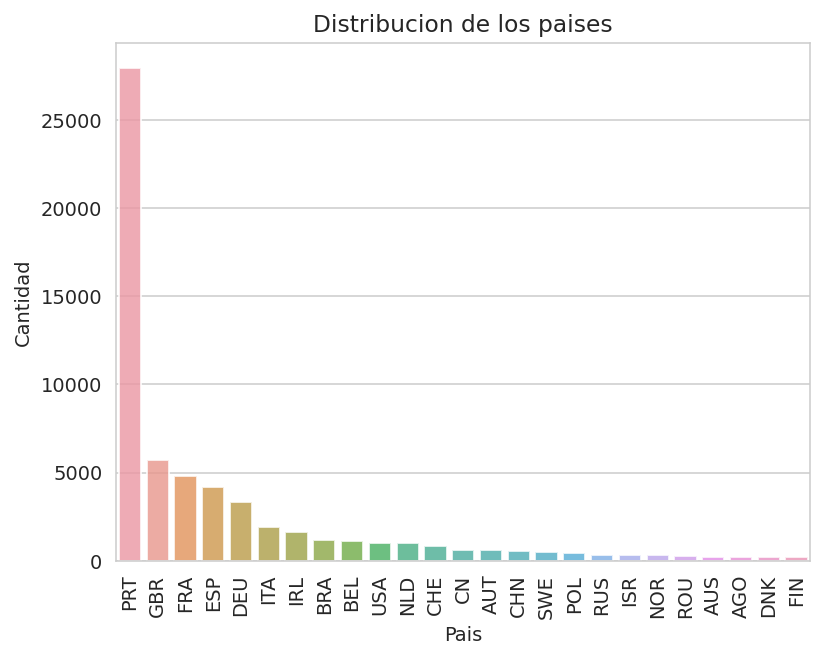

In [17]:
crear_bar_plot(data_paises.head(25),'Pais','Cantidad','Distribucion de los paises')

In [18]:
data_agentes = df_hotels_train[['agent']].groupby(['agent'])['agent'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_agentes.columns = ['Agente','Cantidad']


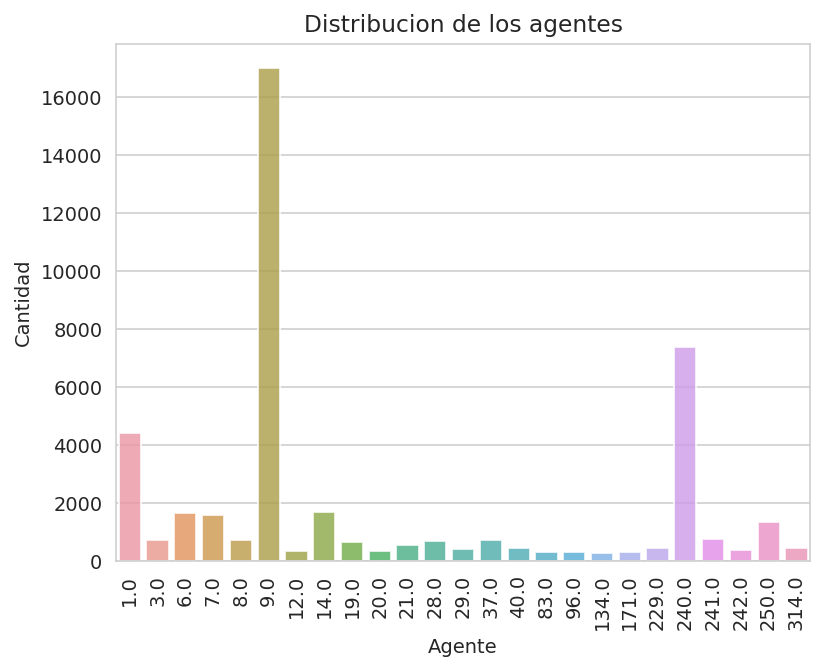

In [19]:
crear_bar_plot(data_agentes.head(25),'Agente','Cantidad','Distribucion de los agentes')

In [20]:
data_depositos = df_hotels_train[['deposit_type']].groupby(['deposit_type'])['deposit_type'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_depositos.columns = ['Deposito','Cantidad']

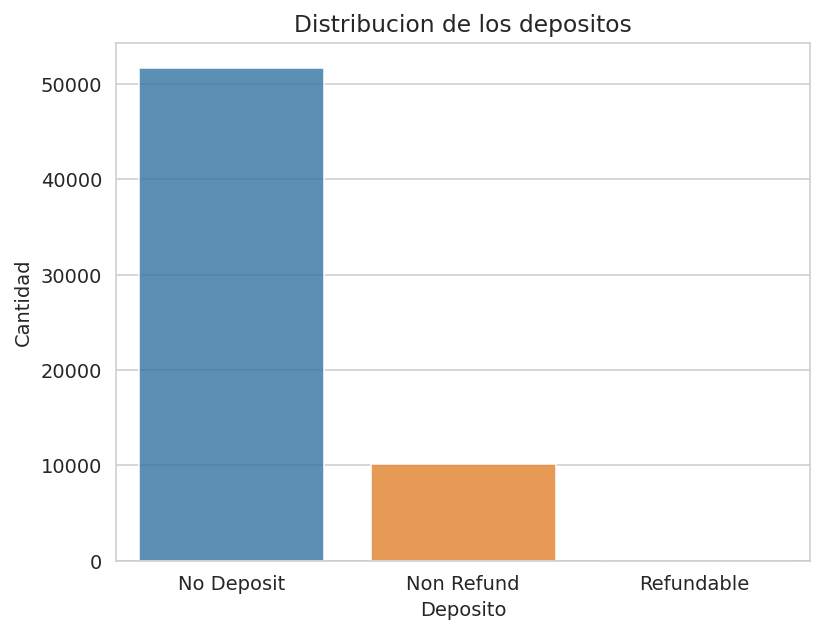

In [21]:
crear_bar_plot(data_depositos.head(25),'Deposito','Cantidad','Distribucion de los depositos')

In [22]:
data_chicos = df_hotels_train[['children']].groupby(['children'])['children'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_chicos.columns = ['Chicos','Cantidad']

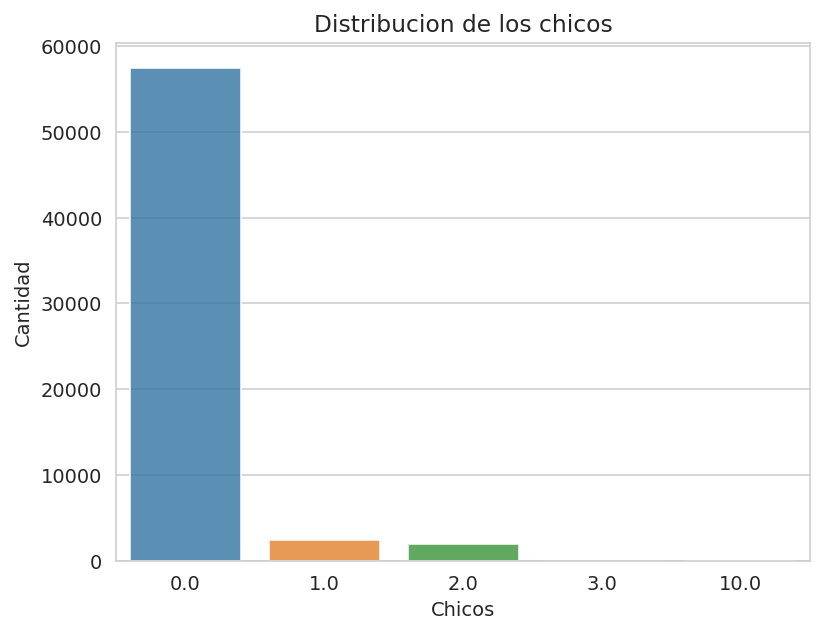

In [23]:
crear_bar_plot(data_chicos.head(25),'Chicos','Cantidad','Distribucion de los chicos')

In [24]:
data_hotel = df_hotels_train[['hotel']].groupby(['hotel'])['hotel'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_hotel.columns = ['Hotel','Cantidad']

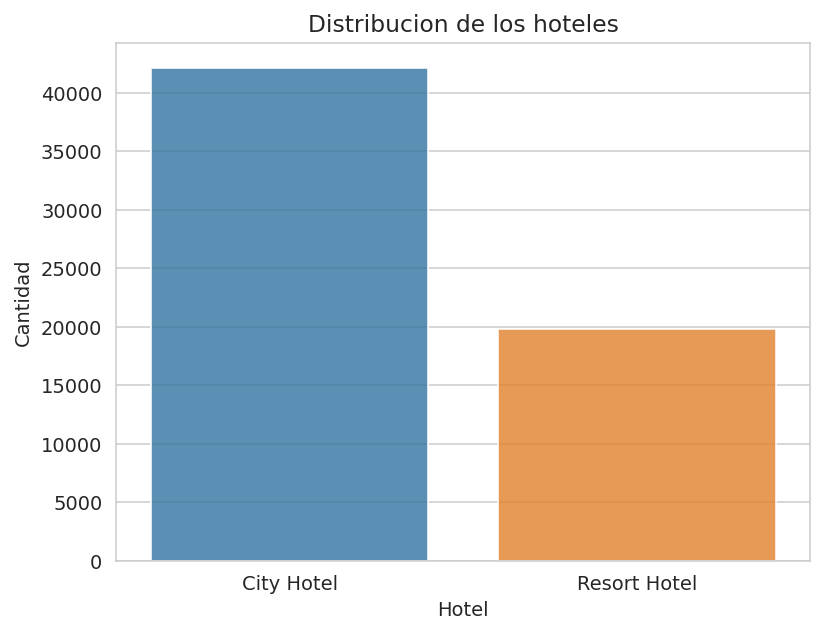

In [25]:
crear_bar_plot(data_hotel.head(25),'Hotel','Cantidad','Distribucion de los hoteles')

In [26]:
data_reservas = df_hotels_train[['reserved_room_type']].groupby(['reserved_room_type'])['reserved_room_type'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_reservas.columns = ['Reserva','Cantidad']

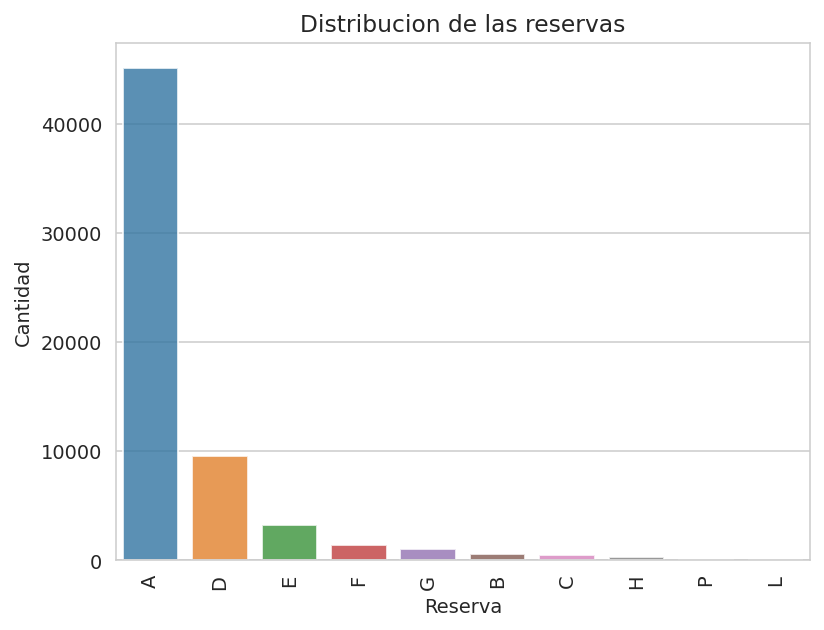

In [27]:
crear_bar_plot(data_reservas.head(25),'Reserva','Cantidad','Distribucion de las reservas')

In [28]:
data_meal = df_hotels_train[['meal']].groupby(['meal'])['meal'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_meal.columns = ['Comida','Tipo']

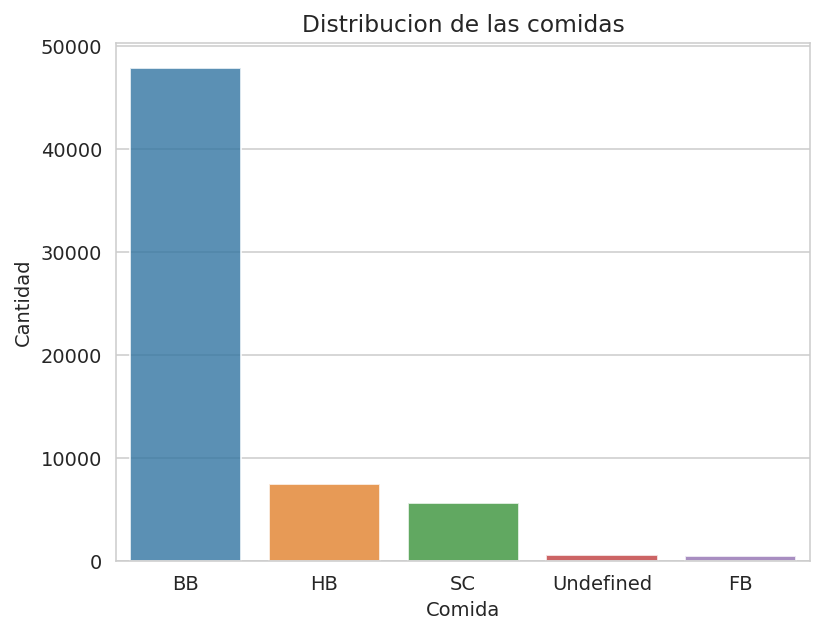

In [29]:
crear_bar_plot(data_meal.head(25),'Comida','Tipo','Distribucion de las comidas')

In [30]:
data_company = df_hotels_train[['company']].groupby(['company'])['company'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_company.columns = ['Compania','Cantidad']

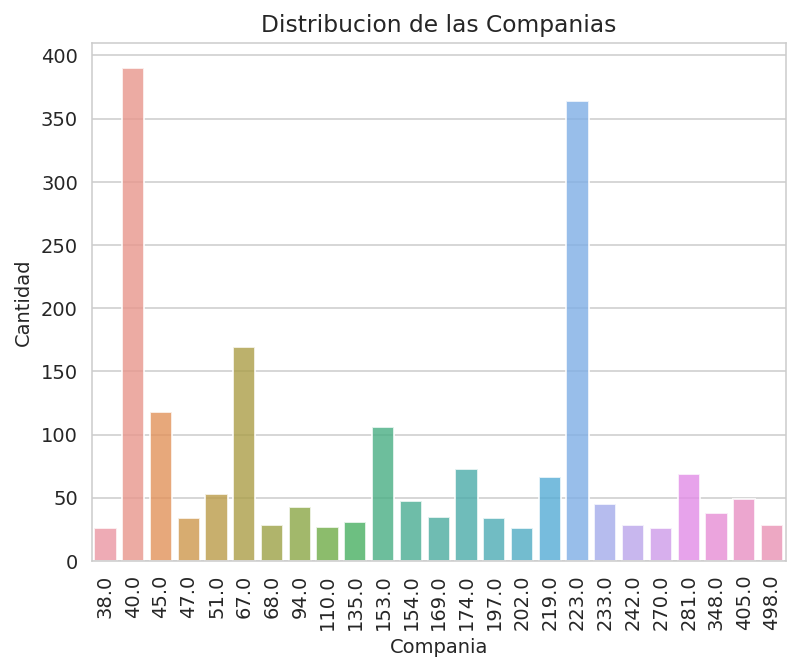

In [31]:
crear_bar_plot(data_company.head(25),'Compania','Cantidad','Distribucion de las Companias')

In [32]:
data_arrivos_date_month = df_hotels_train[['arrival_date_month']].groupby(['arrival_date_month'])['arrival_date_month'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_arrivos_date_month.columns = ['Mes','Cantidad']

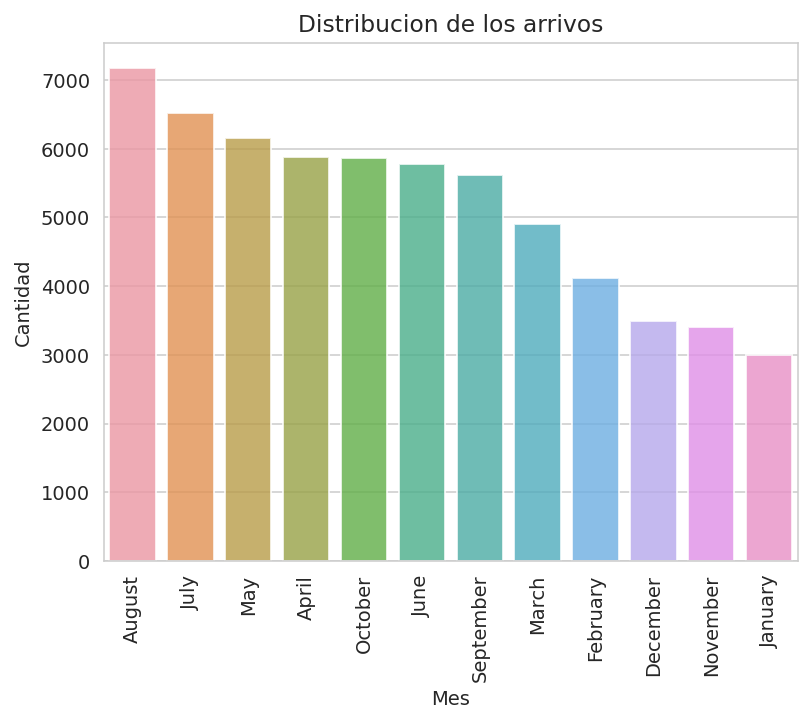

In [33]:
crear_bar_plot(data_arrivos_date_month.head(25),'Mes','Cantidad','Distribucion de los arrivos')

In [34]:
data_m_s = df_hotels_train[['market_segment']].groupby(['market_segment'])['market_segment'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_m_s.columns = ['Mercado','Cantidad']

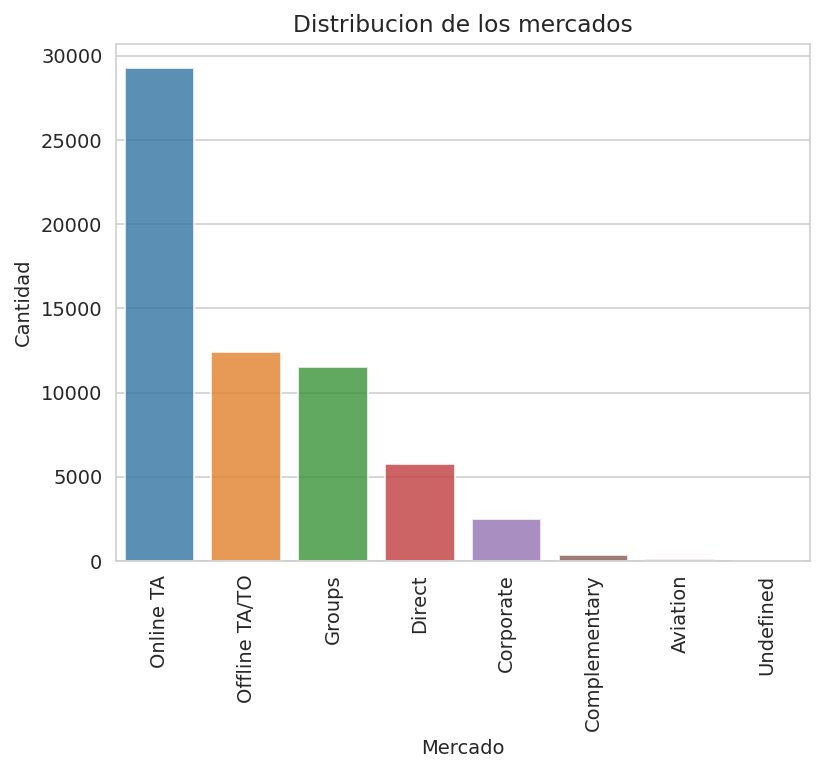

In [35]:
crear_bar_plot(data_m_s.head(25),'Mercado','Cantidad','Distribucion de los mercados')

In [36]:
data_d_s = df_hotels_train[['distribution_channel']].groupby(['distribution_channel'])['distribution_channel'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_d_s.columns = ['Channel','Cantidad']

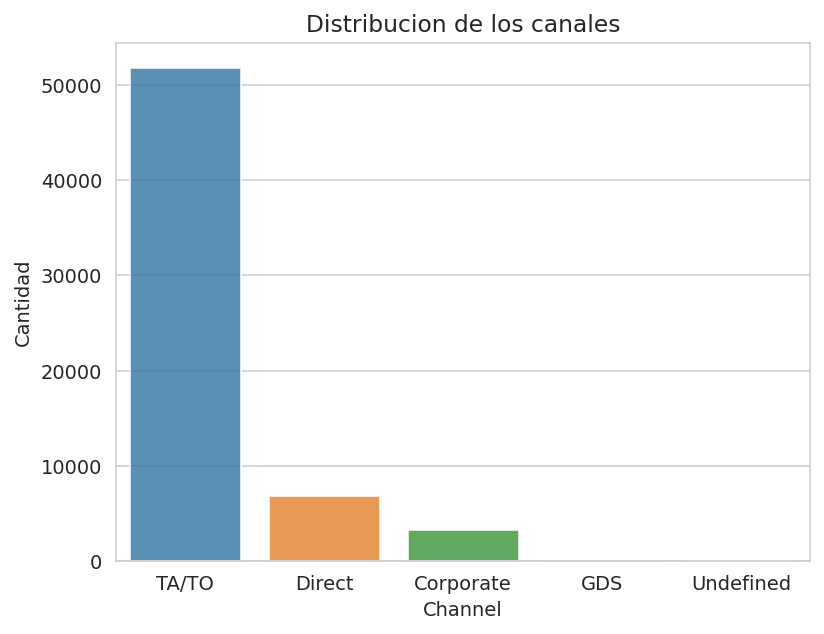

In [37]:
crear_bar_plot(data_d_s.head(25),'Channel','Cantidad','Distribucion de los canales')

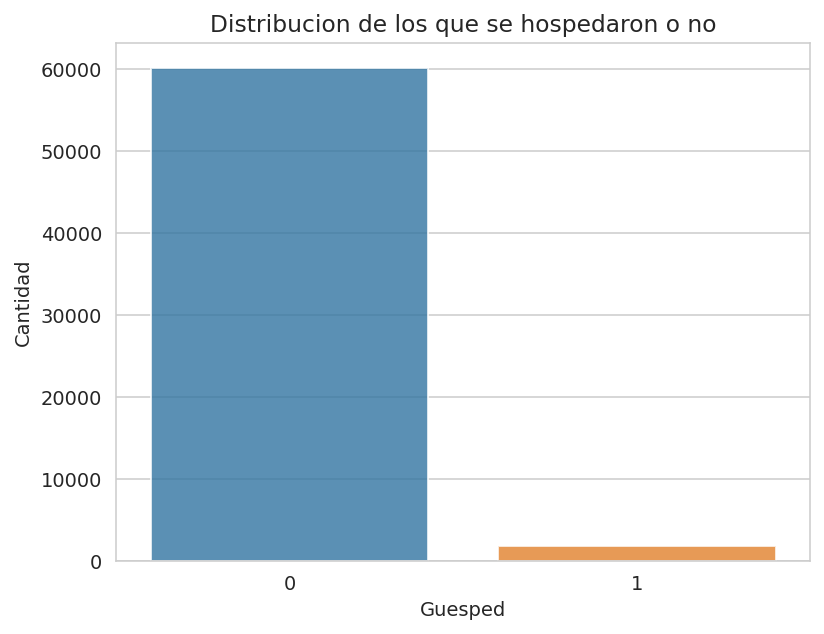

In [38]:
data_r_g = df_hotels_train[['is_repeated_guest']].groupby(['is_repeated_guest'])['is_repeated_guest'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_r_g.columns = ['Guesped','Cantidad']
crear_bar_plot(data_r_g.head(25),'Guesped','Cantidad','Distribucion de los que se hospedaron o no')

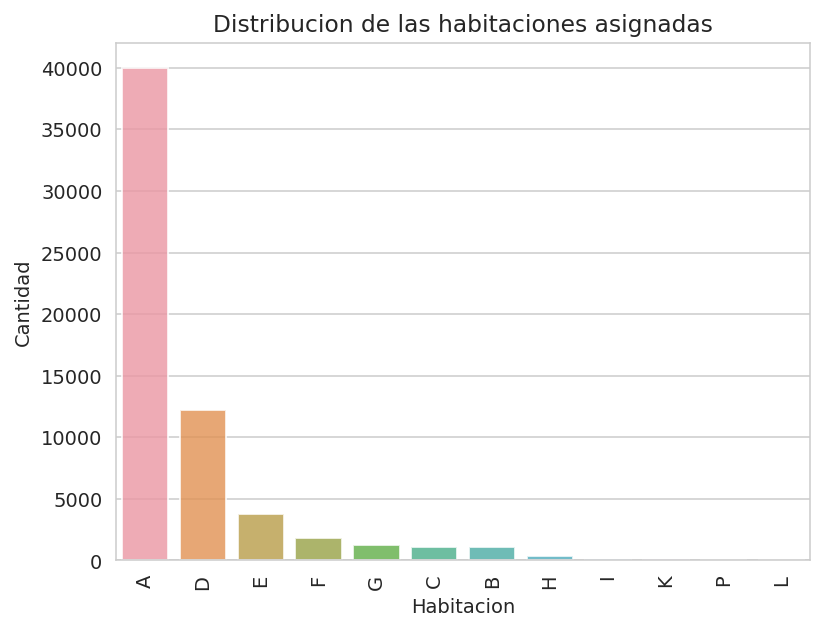

In [39]:
data_a_t = df_hotels_train[['assigned_room_type']].groupby(['assigned_room_type'])['assigned_room_type'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_a_t.columns = ['Habitacion','Cantidad']

crear_bar_plot(data_a_t.head(25),'Habitacion','Cantidad','Distribucion de las habitaciones asignadas')

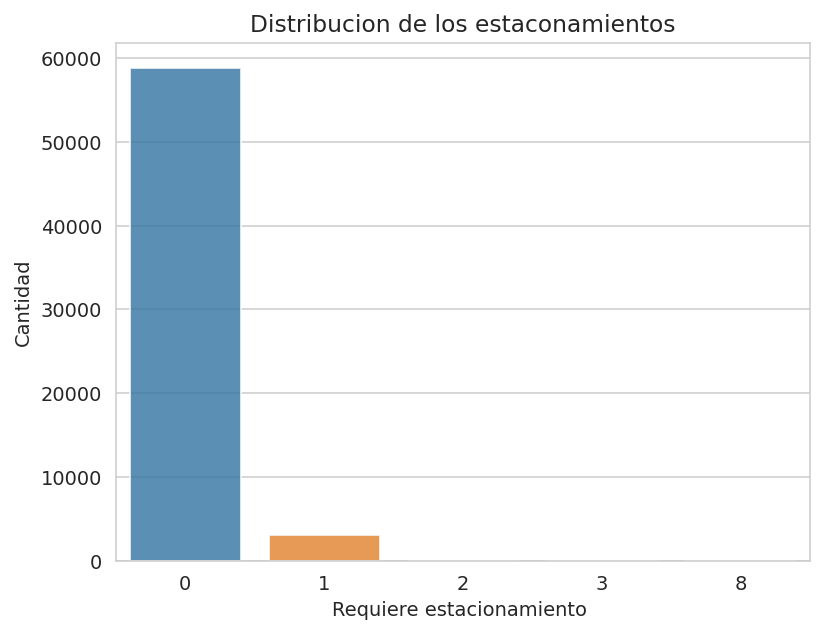

In [40]:
data_r_s = df_hotels_train[['required_car_parking_spaces']].groupby(['required_car_parking_spaces'])['required_car_parking_spaces'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_r_s.columns = ['Requiere estacionamiento ','Cantidad']

crear_bar_plot(data_r_s.head(25),'Requiere estacionamiento ','Cantidad','Distribucion de los estaconamientos')

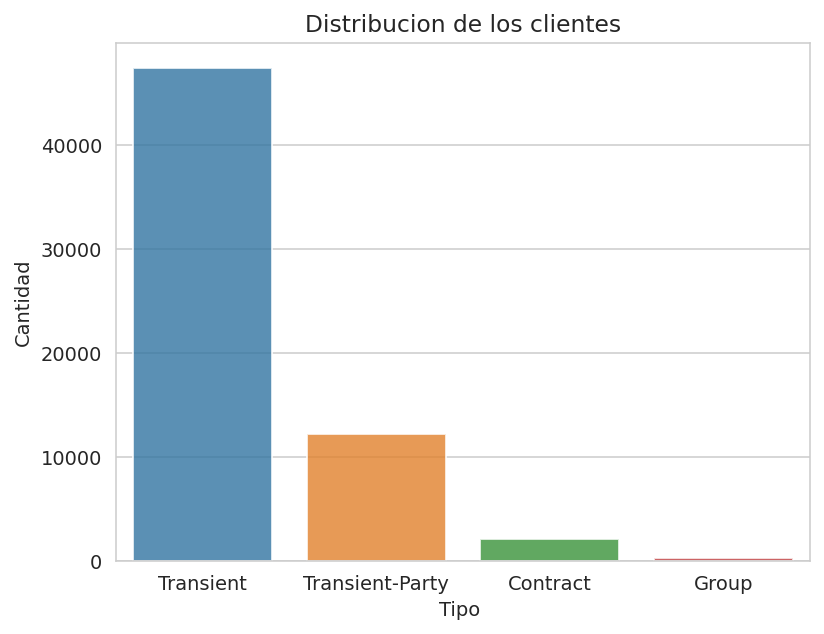

In [41]:
data_c_t = df_hotels_train[['customer_type']].groupby(['customer_type'])['customer_type'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_c_t.columns = ['Tipo ','Cantidad']

crear_bar_plot(data_c_t.head(25),'Tipo ','Cantidad','Distribucion de los clientes')

Variables como id no vale la pena graficarlas, debido a que no representan nada util para el analisis (como ya discutimos antes) por otro lado, nuestra varialble target 'is_canceled' tiene un analisis de su distribucion mas adelante.

Distribucion de variables cuantitativas

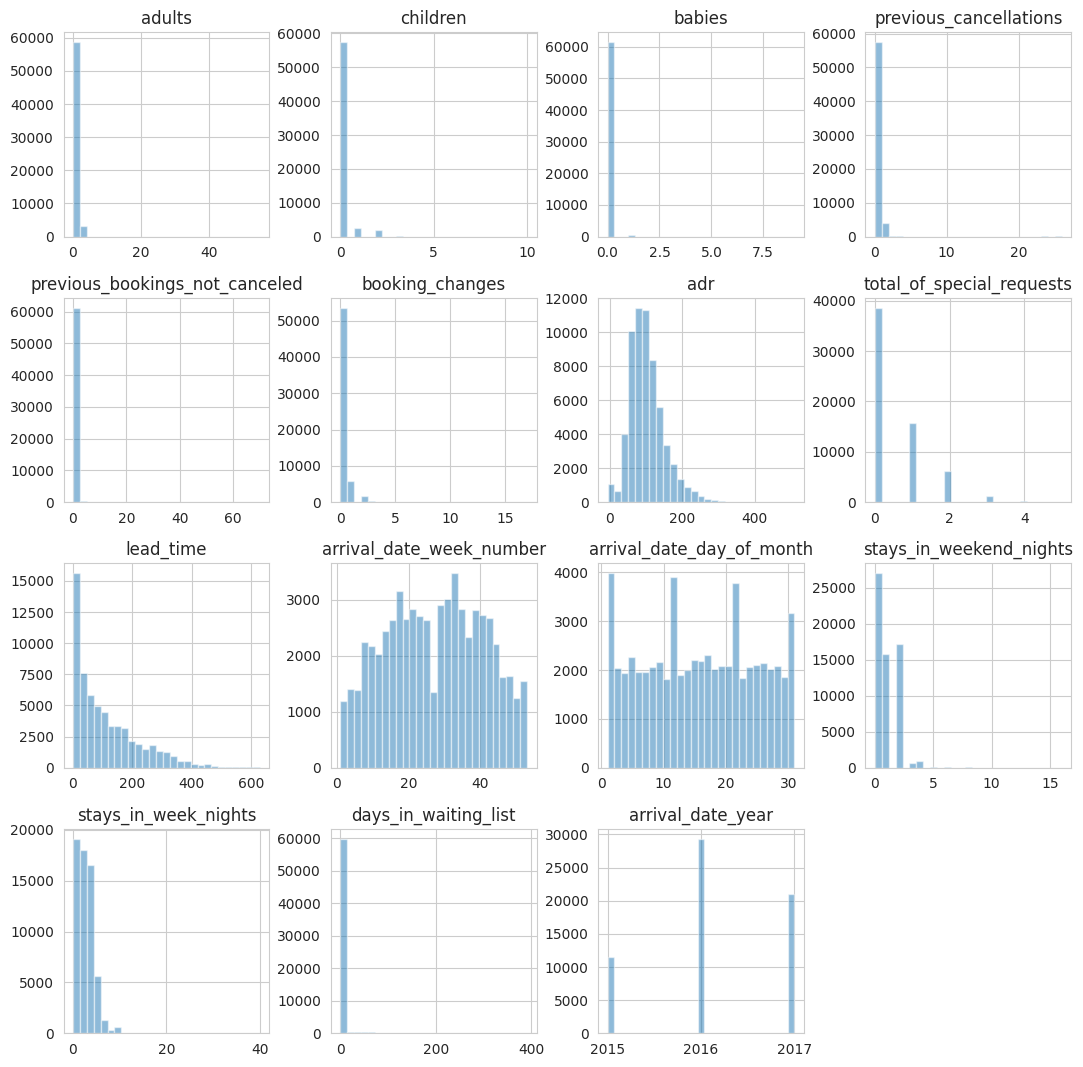

In [42]:
df_hist = df_cuantitativas.hist(figsize=(13,13), bins=27, alpha = 0.5)

En este grafico podemos ver como estan distribuidas las variables cuantitativas

Analisis de la correlacion entre variables

In [43]:
correlacion_todas = df_hotels_train.corr()
display(correlacion_todas)


lead_time  arrival_date_year  \
lead_time                        1.000000           0.023186   
arrival_date_year                0.023186           1.000000   
arrival_date_week_number         0.134793          -0.540542   
arrival_date_day_of_month       -0.006937           0.002326   
stays_in_weekend_nights          0.059463           0.027066   
stays_in_week_nights             0.140110           0.040803   
adults                           0.110942           0.026576   
children                        -0.046058           0.059412   
babies                          -0.022872          -0.013745   
is_repeated_guest               -0.108033          -0.004587   
previous_cancellations           0.094634          -0.142232   
previous_bookings_not_canceled  -0.068102           0.027109   
booking_changes                 -0.019736           0.027285   
agent                           -0.078786           0.081634   
company                          0.150773           0.243066   
days_in_waiting_list             0.166423          -0.058523   
adr                             -0.094559           0.217409   
required_car_parking_spaces     -0.113772          -0.011620   
total_of_special_requests       -0.122760           0.107899   
is_canceled                      0.293816           0.019923   

                                arrival_date_week_number  \
lead_time                                       0.134793   
arrival_date_year                              -0.540542   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.057730   
stays_in_weekend_nights                         0.014127   
stays_in_week_nights                            0.012200   
adults                                          0.025886   
children                                        0.006355   
babies                                          0.016215   
is_repeated_guest                              -0.022037   
previous_cancellations                          0.045530   
previous_bookings_not_canceled                 -0.023897   
booking_changes                                 0.012086   
agent                                          -0.043968   
company                                        -0.040886   
days_in_waiting_list                            0.019328   
adr                                             0.075427   
required_car_parking_spaces                     0.001424   
total_of_special_requests                       0.029283   
is_canceled                                     0.008357   

                                arrival_date_day_of_month  \
lead_time                                       -0.006937   
arrival_date_year                                0.002326   
arrival_date_week_number                         0.057730   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.015518   
stays_in_week_nights                            -0.026449   
adults                                           0.002449   
children                                         0.013991   
babies                                           0.002568   
is_repeated_guest                               -0.005230   
previous_cancellations                          -0.034516   
previous_bookings_not_canceled                  -0.002026   
booking_changes                                  0.009522   
agent                                            0.002600   
company                                          0.049011   
days_in_waiting_list                             0.027754   
adr                                              0.033695   
required_car_parking_spaces                      0.000295   
total_of_special_requests                        0.007744   
is_canceled                                     -0.007371   

                                stays_in_weekend_nights  stays_in_week_nights  \
lead_time                                      0.059463        

En esta tabla podemos ver que hay varias variables que estan fuertemente o debilmente correlacionadas, tambien haremos un analisis con nuestra variable target, por lo tanto veremos los graficos en el siguiente punto

Analisimos el target con el resto de las variables

In [44]:
#Recalco que para ver las correlacion las varaibles deben ser del tipo numerica
correlations = df_hotels_train.corr()['is_canceled']
display(correlations)

lead_time                         0.293816
arrival_date_year                 0.019923
arrival_date_week_number          0.008357
arrival_date_day_of_month        -0.007371
stays_in_weekend_nights           0.001279
stays_in_week_nights              0.028439
adults                            0.060179
children                          0.006242
babies                           -0.032034
is_repeated_guest                -0.090492
previous_cancellations            0.099613
previous_bookings_not_canceled   -0.065868
booking_changes                  -0.159315
agent                            -0.086176
company                          -0.040010
days_in_waiting_list              0.050827
adr                               0.049206
required_car_parking_spaces      -0.225915
total_of_special_requests        -0.244997
is_canceled                       1.000000
Name: is_canceled, dtype: float64

Realizaremos dos graficos para el analisis de las correlaciones con nuestras variable, separandolos en "positivas" y "negativas"

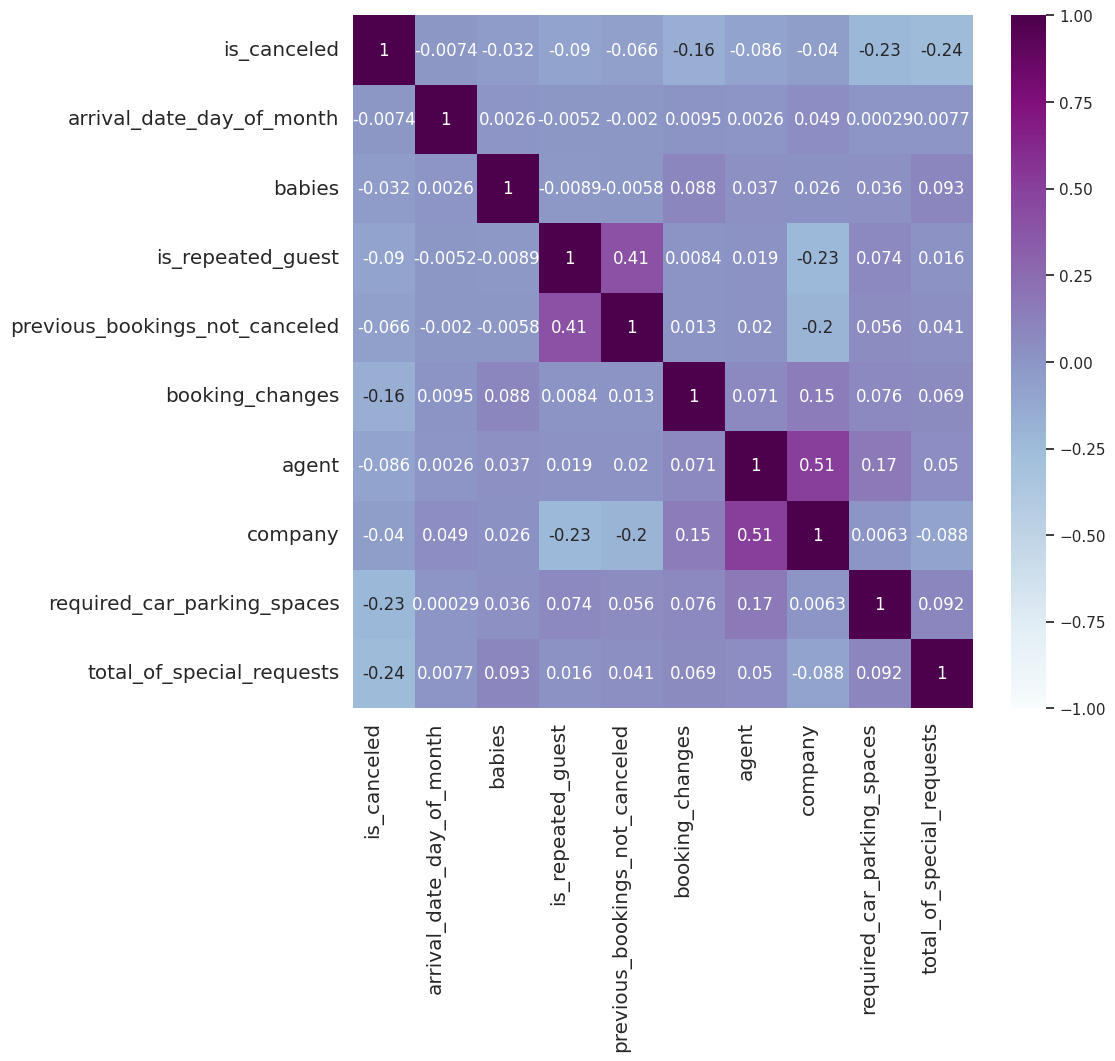

In [45]:
lista_corr_negativas = ['is_canceled','arrival_date_day_of_month','babies','is_repeated_guest','previous_bookings_not_canceled','booking_changes','agent','company','required_car_parking_spaces','total_of_special_requests']
corr_matrix = df_hotels_train[lista_corr_negativas].corr() 
sns.set(rc = {'figure.figsize':(10,9)})
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="BuPu")
heatmap.set_xticklabels(
    
    heatmap.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)

heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontweight='light',
    fontsize='large'
)



plt.show()

Vemos que las variables que tiene la correlacion "negativa" mas alta son required_card_parking_space ,total_of_spaces_request y booking_changed. Luego tenemos otras que tienen una menor relacion con nuestra variable target como arrival_date_day_of_month (la cual es casi 0)

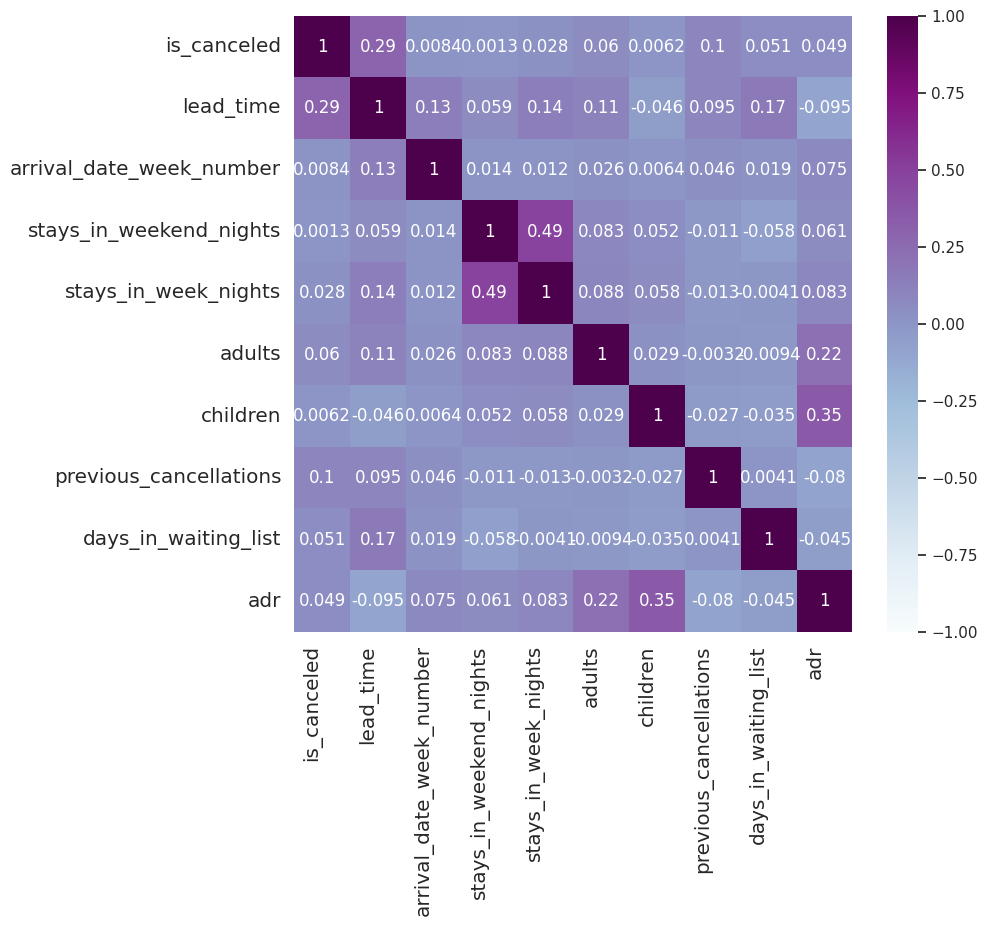

In [46]:


lista_corr_positiva = ['is_canceled','lead_time','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights','adults','children','previous_cancellations','days_in_waiting_list','adr',]
corr_matrix = df_hotels_train[lista_corr_positiva].corr()
sns.set(rc = {'figure.figsize':(9,8)})
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="BuPu")
heatmap.set_xticklabels(
    
    heatmap.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)

heatmap.set_yticklabels(
    heatmap.get_yticklabels(),
    fontweight='light',
    fontsize='large'
)



plt.show()

Podemos ver que las variables que tienen una relacion "positiva" mas alta con nuestro target son lead_time y previos cancelation.
Luego, tenemos algunas variables que tambien tienen un correlacion considerable como adults (la cual, es bastante baja).
El resto de las variables tiene una correlacion muy baja con nuestra variable target

Como punto final, podemos tambien analizar la correlacion entre todas nuestras variables. ademas de nuestra variable target y ver si sus correlacion son fuertes o debiles

## Visualización de los datos

Como primera visualizacion de nuestros datos empezaremos por nuestra variable target (is_caceled)

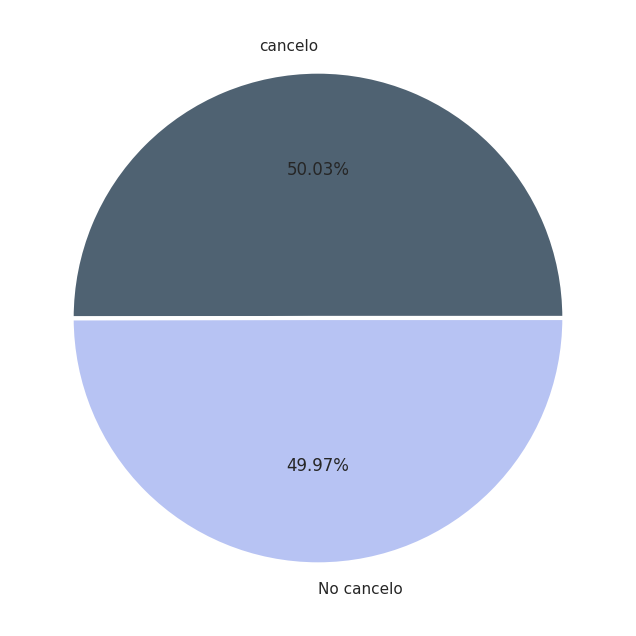

In [47]:
cancelaciones = df_hotels_train['is_canceled'].value_counts()
colores = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
nombres = 'cancelo','No cancelo'
plt.pie(cancelaciones, labels = nombres, labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors = colores, autopct = '%1.2f%%')
plt.show()

Como primer analisis vemos que tenemos un 50.03% de reservas canceladas y un 49.97% que no.

Como siguiente visualizacion, haremos un grafico para ver la dispersion de nuestros datos.
Trataremos de graficar las dispersiones que consideremos mas importantes

## Relaciones variables numéricas

Se eligieron las variables porque son las que tienen una correlacion alta en las matrices graficadas, y tambien las que mas sentido tienen desde un punto de vista de conocimiento de negocio.

<Axes: xlabel='lead_time', ylabel='adr'>

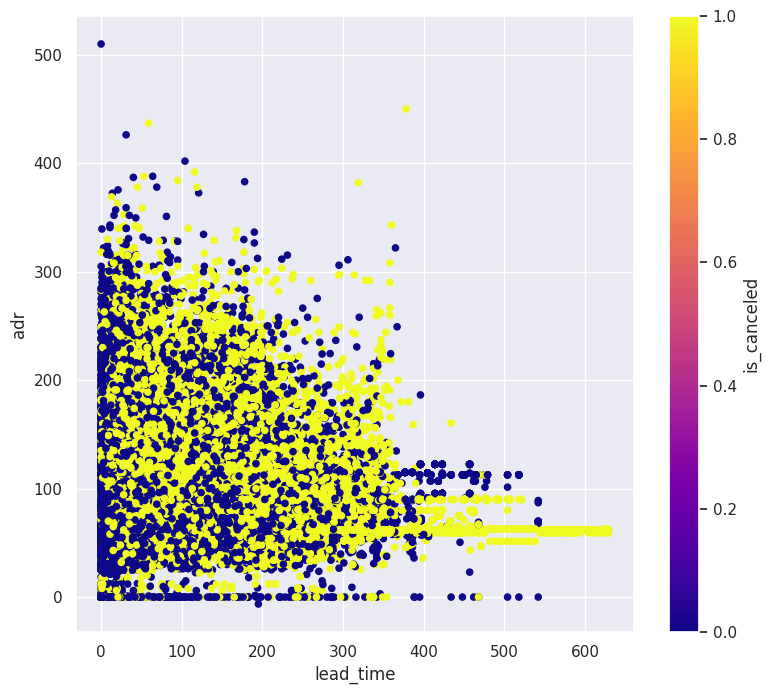

In [48]:
df_hotels_train.plot.scatter(x="lead_time", y="adr", c="is_canceled", colormap="plasma")

Se observan dos tipos de situaciones:
* La mayoria de huespedes que reserva sin anticipacion no cancelan las reservas.
* Hay cuatro "lineas" horizontales, aproximadamente en adr = 0, 75, 90 y 120 (valores aproximados). Se aprecia para las de 0 y 120 que las reservas no fueron canceladas, y para las de 75 y 90 que si.

<Axes: xlabel='stays_in_week_nights', ylabel='stays_in_weekend_nights'>

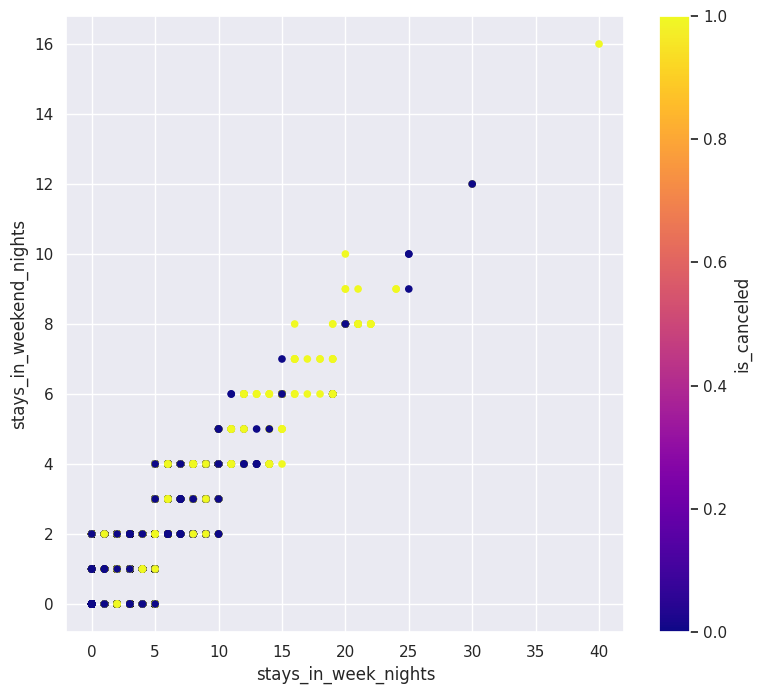

In [49]:
df_hotels_train.plot.scatter(x="stays_in_week_nights", y="stays_in_weekend_nights", c="is_canceled", colormap="plasma")

Se observa la correlacion entre las variables, y se puede decir que cuanto mayor sea la estadia, mayor seran las chances de que sea cancelada.

<Axes: xlabel='lead_time', ylabel='days_in_waiting_list'>

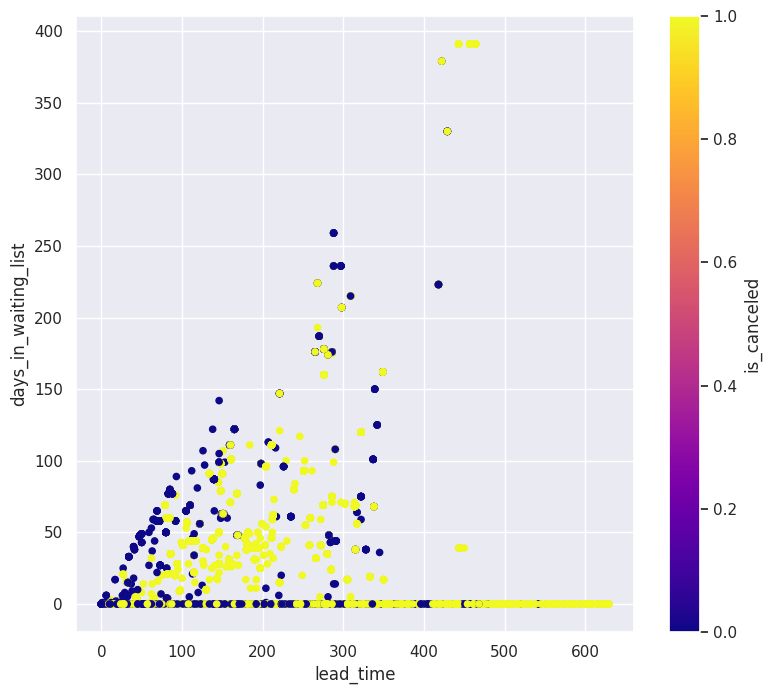

In [50]:
df_hotels_train.plot.scatter(x="lead_time", y="days_in_waiting_list", c="is_canceled", colormap="plasma")

Podemos apreciar que aunque haya muchas reservas con 0 dias en lista de espera, aquellas que se hicieron con mayor anticipacion fueron canceladas con mayor frecuencia.

<Axes: xlabel='adr', ylabel='previous_cancellations'>

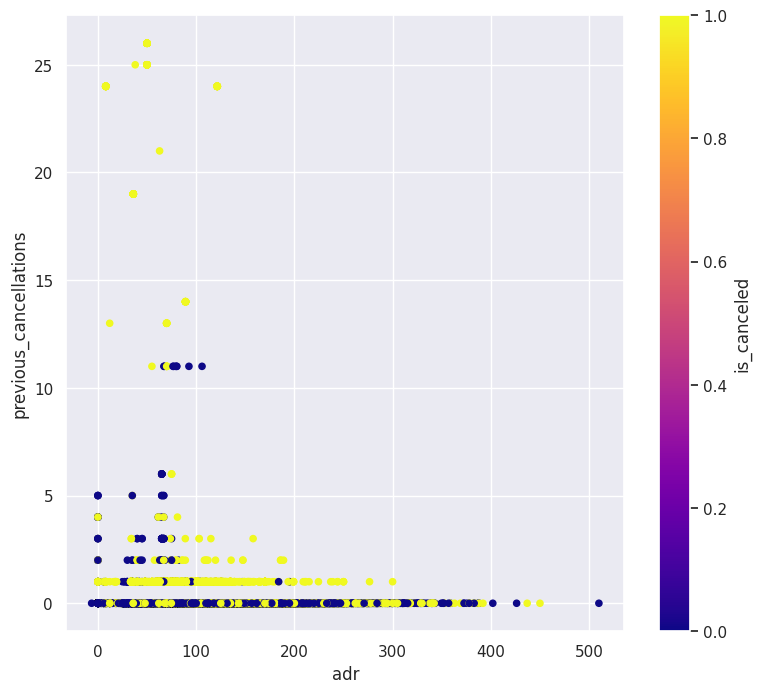

In [51]:
df_hotels_train.plot.scatter(x="adr", y="previous_cancellations", c="is_canceled", colormap='plasma')

Se observa que con una cancelacion previa, es muy probable que los huespedes vuelvan a cancelar, ademas con 2 y 3 cancelaciones previas, a partir de 80 adr (aprox) es mas probable que cancelen.

<Axes: xlabel='lead_time', ylabel='previous_cancellations'>

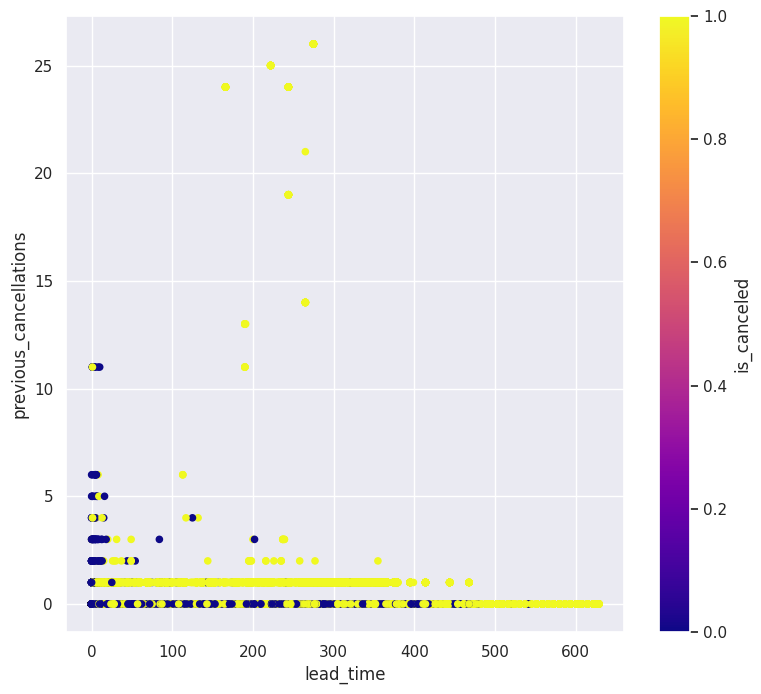

In [52]:
df_hotels_train.plot.scatter(x="lead_time", y="previous_cancellations", c="is_canceled", colormap='plasma')

Se observa que con 0 cancelaciones previas, a partir de 350 dias (aprox) de anticipacion, la reserva es probable que se cancele. Con 1, y 2 cancelaciones previas, casi no afecta el tiempo de anticipacion, ya que es muy probable que las reservas sean canceladas.

## Relaciones variables categóricas

Se eligieron las variables [assigned_room_type, hotel, is_canceled, customer_type, market_segment] para ver como se distribuyen los tipos de huesped en los hoteles, y si esto impacta en la cancelacion de reservas.

In [53]:
def create_xtab_barplot(df, col1, col2, figsize=(6,4), sample_pct=1):
    sample_size = math.ceil(sample_pct * df.shape[0])
    pd.crosstab(index=df[col1].sample(sample_size),columns=df.sample(sample_size)[col2]).plot.bar(figsize=figsize, rot=0)

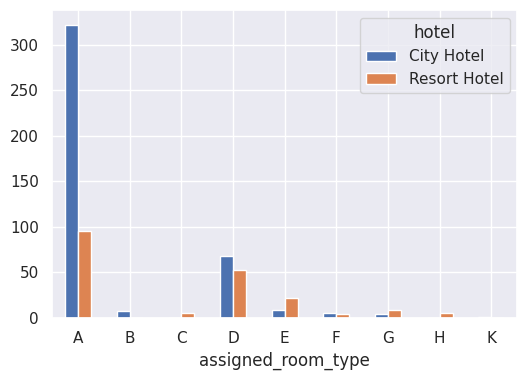

In [54]:
create_xtab_barplot(df_hotels_train, "assigned_room_type", "hotel", sample_pct=0.1)

Es mas probable que las habitaciones A, B, D, F y K sean asignadas en el City Hotel. Las C, E, G, H e I en el Resort Hotel.

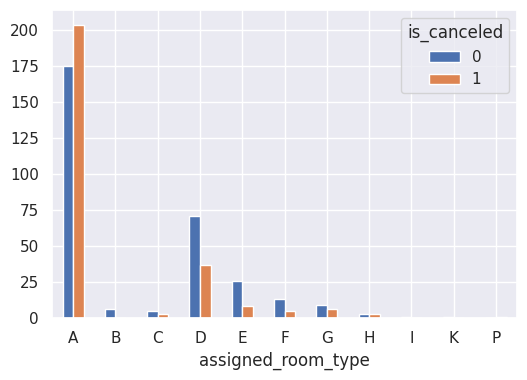

In [55]:
create_xtab_barplot(df_hotels_train, "assigned_room_type", "is_canceled", sample_pct=0.1)

Es mas probable que la reserva sea cancelada si se asigno una habitacion de tipo A.

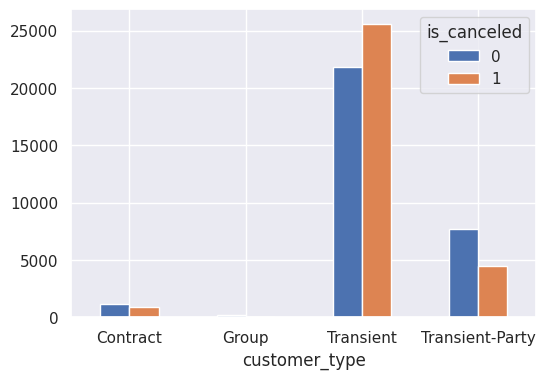

In [56]:
create_xtab_barplot(df_hotels_train, "customer_type", "is_canceled")

Si el tipo de huesped es Transient, entonces es mas probable que cancele la reserva respecto a los demas tipos de huesped.

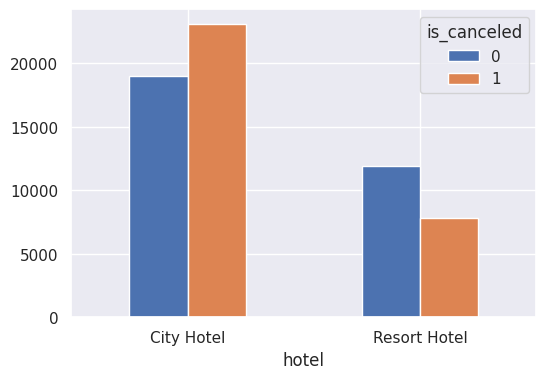

In [57]:
create_xtab_barplot(df_hotels_train, "hotel", "is_canceled")

Es mas probable que la reserva sea cancelada para el City Hotel que para el Resort Hotel

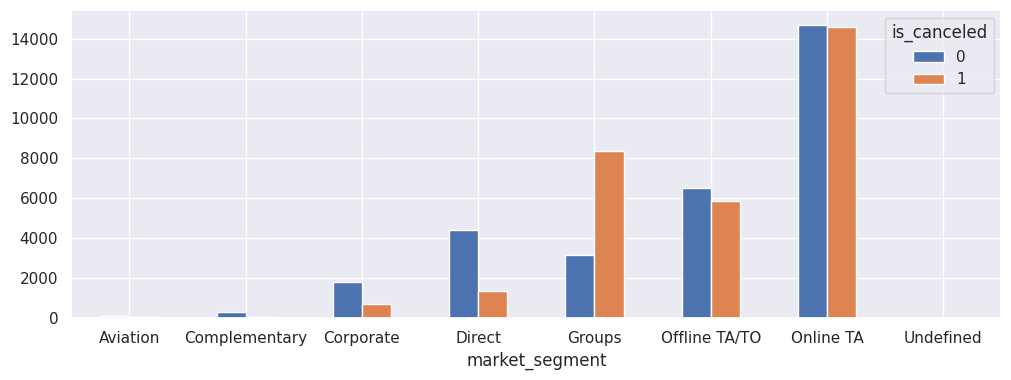

In [58]:
create_xtab_barplot(df_hotels_train, "market_segment", "is_canceled", (12,4))

Es mas probable que la reserva sea cancelada para Groups market segment.

##Datos Faltantes

Analizar la presencia de datos faltantes en el dataset

In [59]:
datos_faltantes = df_hotels_train.isnull().sum()
print(datos_faltantes)

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Obeservamos que en las columnas de: country, children, agent y company tenemos datos faltantes (por datos faltantes nos referimos a los datos que aparecen como NaN)

Realizamos los graficos correspondientes a dichos datos faltantes

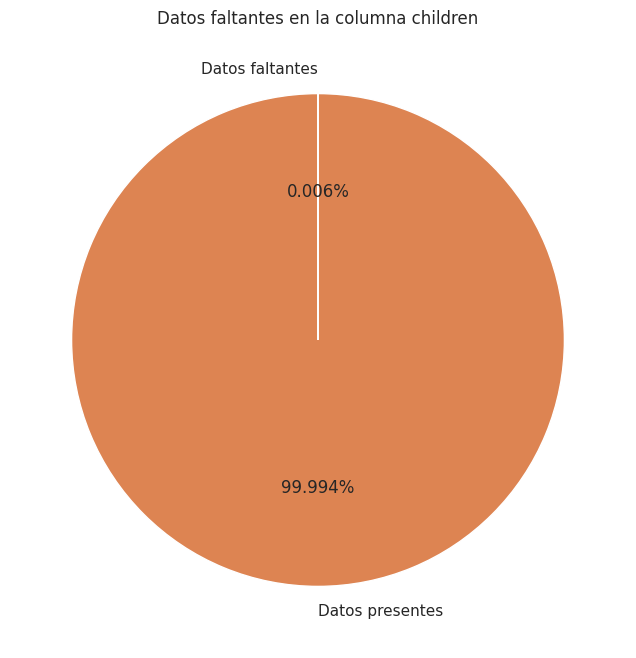

In [60]:
datos_faltantes = df_hotels_train['children'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna children')

plt.show()




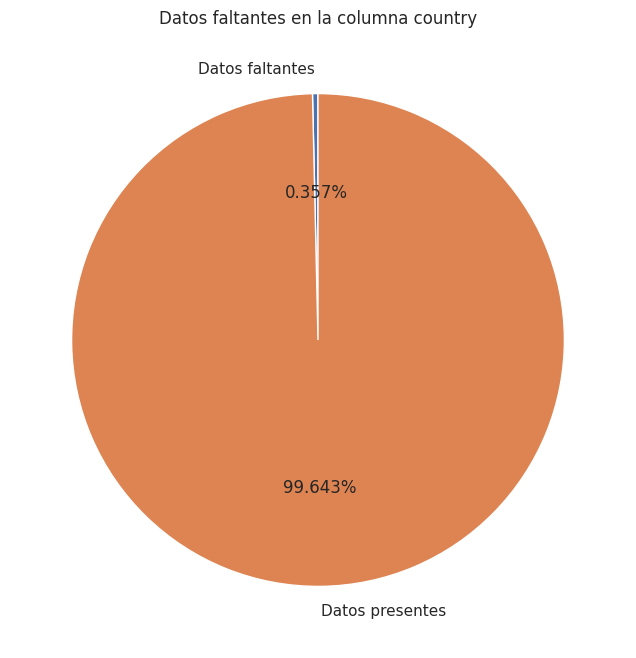

In [61]:
datos_faltantes = df_hotels_train['country'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna country')

plt.show()

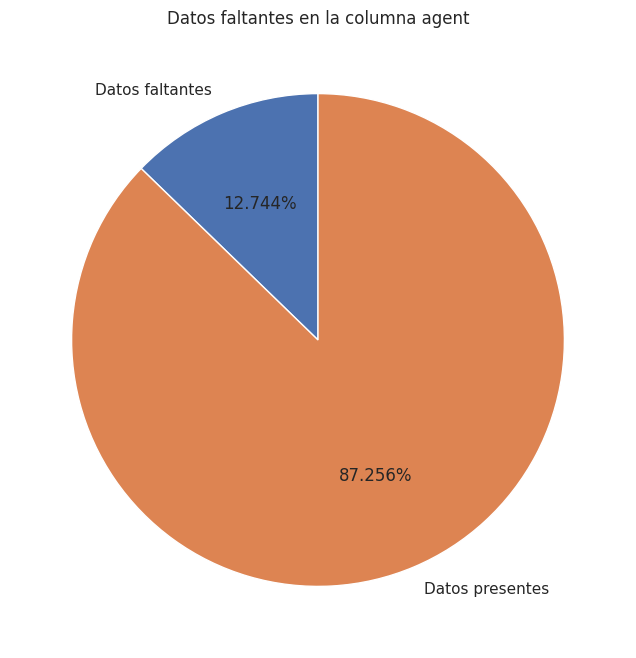

In [62]:
datos_faltantes = df_hotels_train['agent'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna agent')

plt.show()

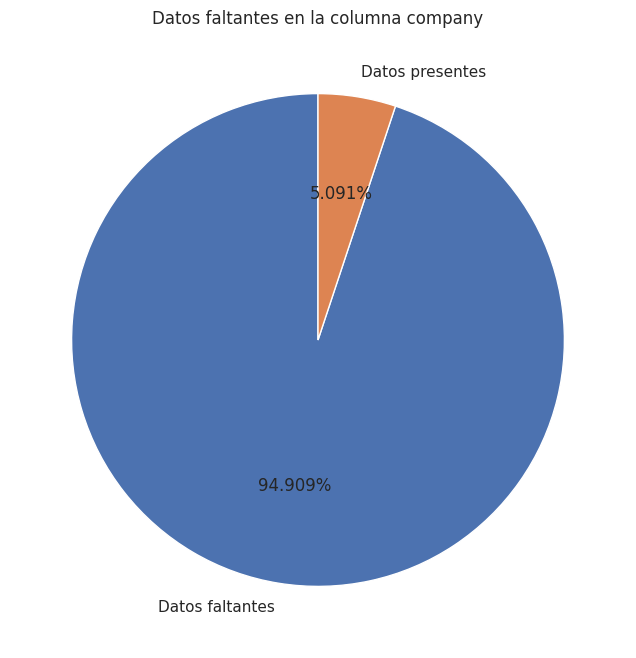

In [63]:
datos_faltantes = df_hotels_train['company'].isnull().sum()

labels = ['Datos faltantes', 'Datos presentes']
sizes = [datos_faltantes, len(df_hotels_train) - datos_faltantes]
plt.pie(sizes, labels=labels, autopct='%1.3f%%', startangle=90)

plt.title('Datos faltantes en la columna company')

plt.show()

Decision sobre los datos faltantes 

En las columnas company y agent se detectaron varios datos nulos (NaN), sin embargo estos datos no deben ser considerados datos faltantes ya que tienen significado y son utilizados como un tipo de valor mas. Por lo tanto remplazamos estos valores por -9999 asi evitamos problemas mas adelante.

In [65]:
#Company
df_hotels_train['company'].fillna(-9999, inplace=True)

In [66]:
#Agent
df_hotels_train['agent'].fillna(-9999, inplace=True)

Las columnas children y country tienen una cantidad menor de datos faltantes, entonces vamos a tomar una moda y rellenarlas.
Tomaremos el valor que mas se repite como moda y lo usaremos para rellenas las columnas de datos faltantes
Esta decision se debe a que conocemos bastante de dichas columnas, por lo tanto la decision mas acertada nos parece reemplazar los datos.

In [67]:
#Country
df_hotels_train['country'].fillna('PRT', inplace=True)

In [68]:
#Children
df_hotels_train['children'].fillna(0, inplace=True)

In [69]:
datos_despues_de_rellenarlos = df_hotels_train.isnull().sum()
print(datos_despues_de_rellenarlos)

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Vemos que despues de realizar las imputaciones de los datos (y la eliminacion de company) no tenemos datos faltantes en nuestro dataset aparte de las columnas agent y company ya que dijimos que esos datos no son faltantes sino nulos y tienen utilidad.

Graficos una vez realizada las imputaciones

In [70]:
#Children
data_chicos = df_hotels_train[['children']].groupby(['children'])['children'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_chicos.columns = ['Chicos','Cantidad']

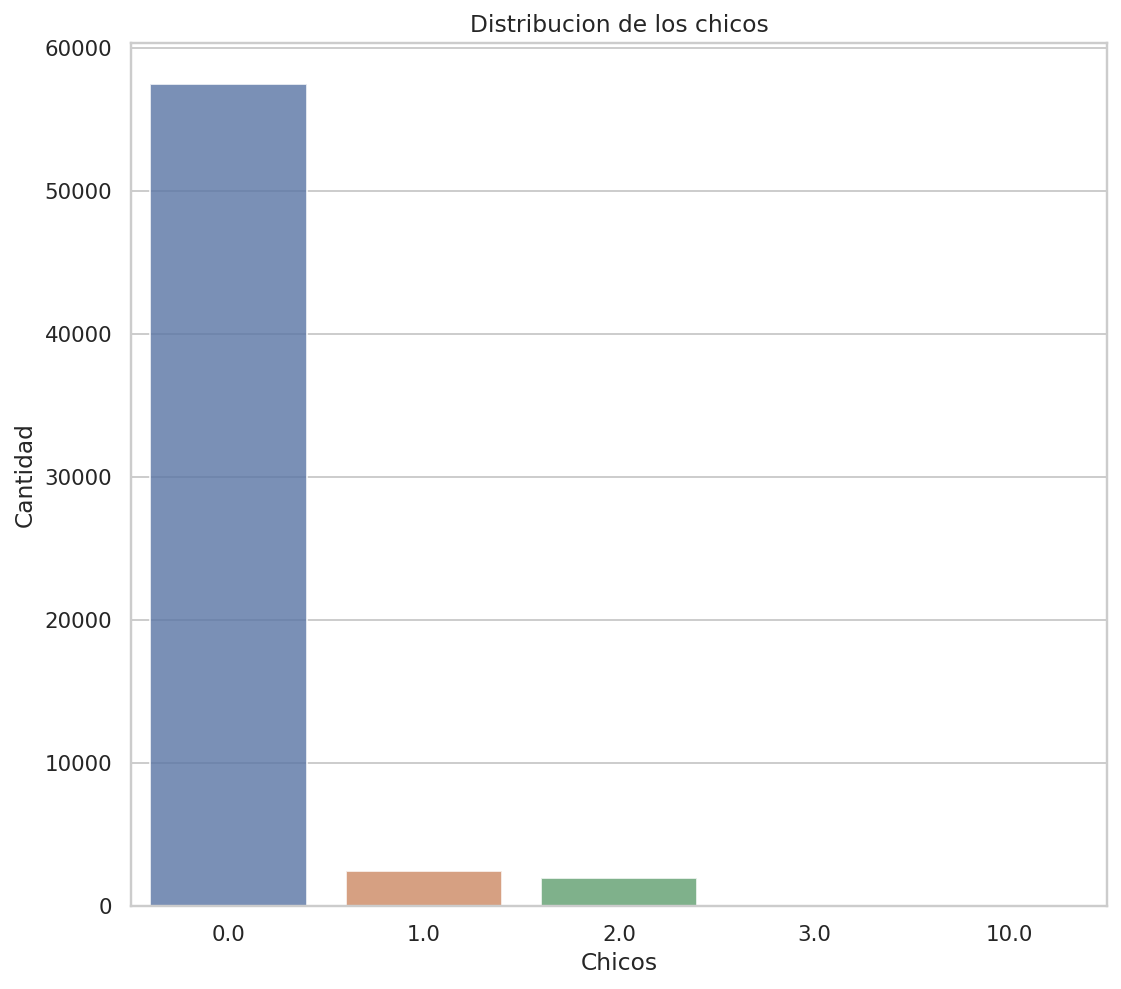

In [71]:
crear_bar_plot(data_chicos.head(25),'Chicos','Cantidad','Distribucion de los chicos')

La variable children no tiene cambios en su grafico (debido a que tenemos un porcentaje bajisimo de datos faltantes)

In [72]:
data_paises = df_hotels_train[['country']].groupby(['country'])['country'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_paises.columns = ['Pais','Cantidad']

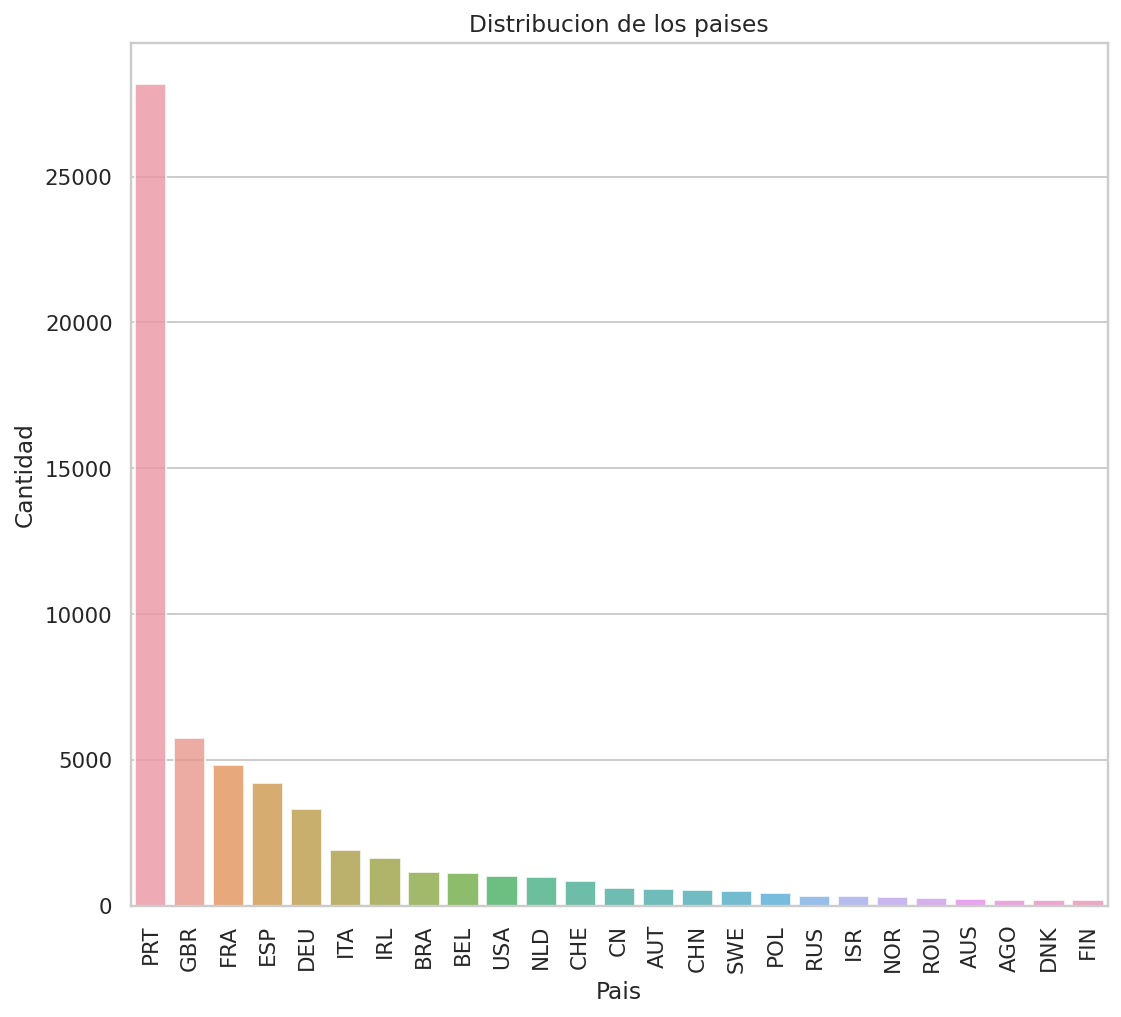

In [73]:
#Countrys
crear_bar_plot(data_paises.head(25),'Pais','Cantidad','Distribucion de los paises')

Como vemos en el grafico, no notamos un incremento en paises, debido a que los datos faltantes tambien es muy bajo como para notar una alteracion en la distribucion de datos

In [74]:
#Agentes
data_agentes = df_hotels_train[['agent']].groupby(['agent'])['agent'].count().reset_index(name='count').sort_values(by=['count'], ascending=False)
data_agentes.columns = ['Agente','Cantidad']

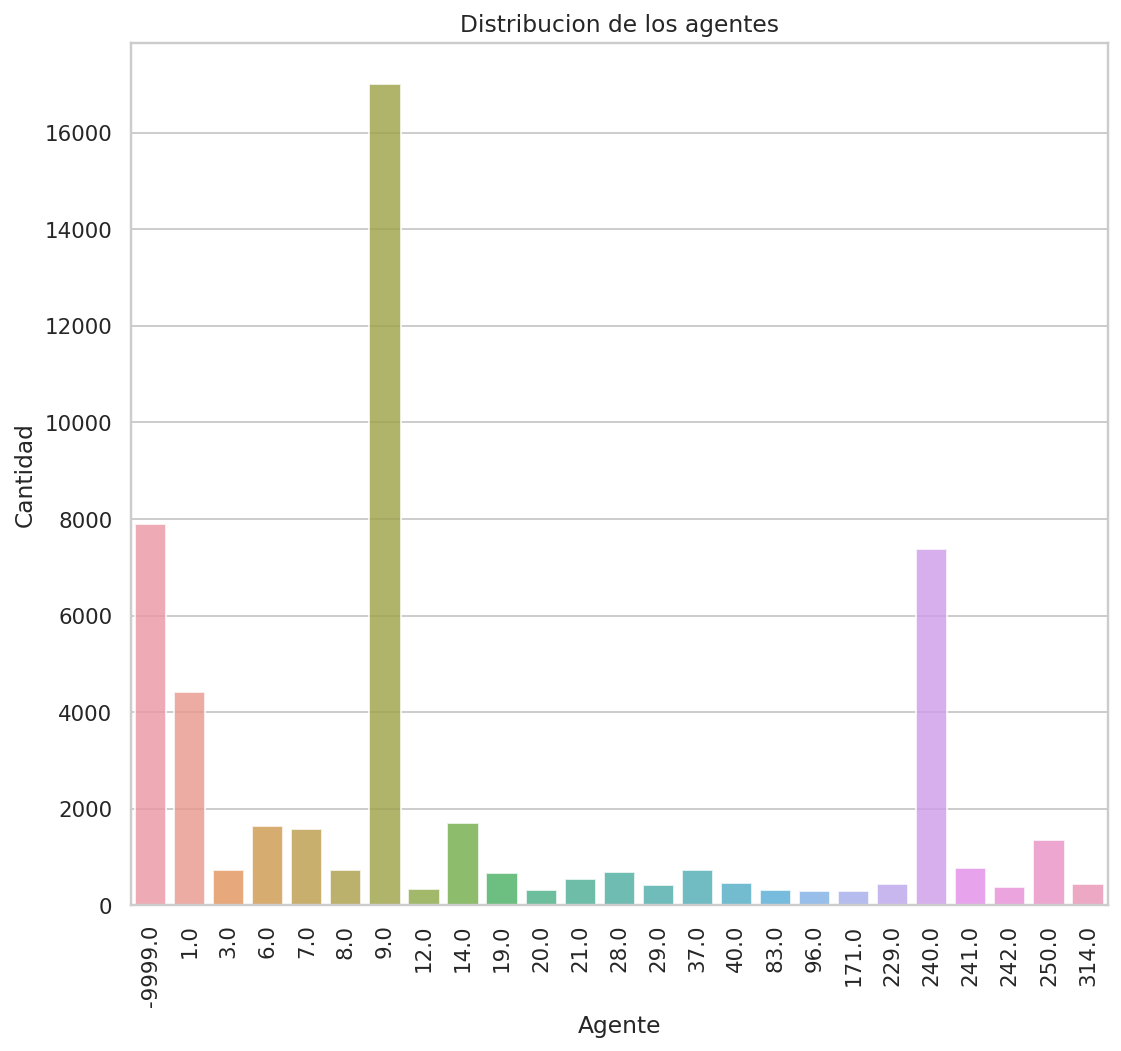

In [75]:
crear_bar_plot(data_agentes.head(25),'Agente','Cantidad','Distribucion de los agentes')

Como vemos en en esa distribucion, si notamos un gran cambio de acuerdo a la original ya que el agent 9.0 pasa de tener 16 mil a casi 25 mil.
Era de esperarse, ya que rellenamos una gran parte del dataset, por lo tanto la distribucion tenia que subir.

Ejecutamos nuevamente el groupby y volvemos a sumar las variables, ya que como imputamos mas datos necesitamos ver los cambios que se realizan en los graficos.
El unico cambio notorio lo tenemos en la variable agent.

##Valores Atípicos

En esta estapa de nuestro analisis mostraremos los datos, tanto de forma univariada como multivariada. Analizaremos los valores atipicos y tomaremos decisiones respecto a ellos

Analisis Univariado usando zscore con un umbral de 3

Columna lead_time

In [76]:
#columnas:(lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, previous_bookings_not_canceled, booking_changes, days_in_waiting_list, required_car_parking_spaces)
media_lead_time=np.mean(df_hotels_train.lead_time)
std_lead_time=np.std(df_hotels_train.lead_time)
df_zscore = pd.DataFrame()
df_zscore['z_lead_time']=(df_hotels_train.lead_time - media_lead_time)/std_lead_time
df_zscore[df_zscore['z_lead_time']>3]


z_lead_time
15        3.186066
51        3.402834
95        3.086713
426       3.691859
576       4.640223
...            ...
61579     3.655731
61695     3.213162
61761     3.466059
61783     3.086713
61790     3.845404

[732 rows x 1 columns]

En esta tabla podemos ver que hay 732 valores que superan el z_score de 3 y por ende son considerados atipicos.
Realizamos un grafico para visualizarlo mejor:

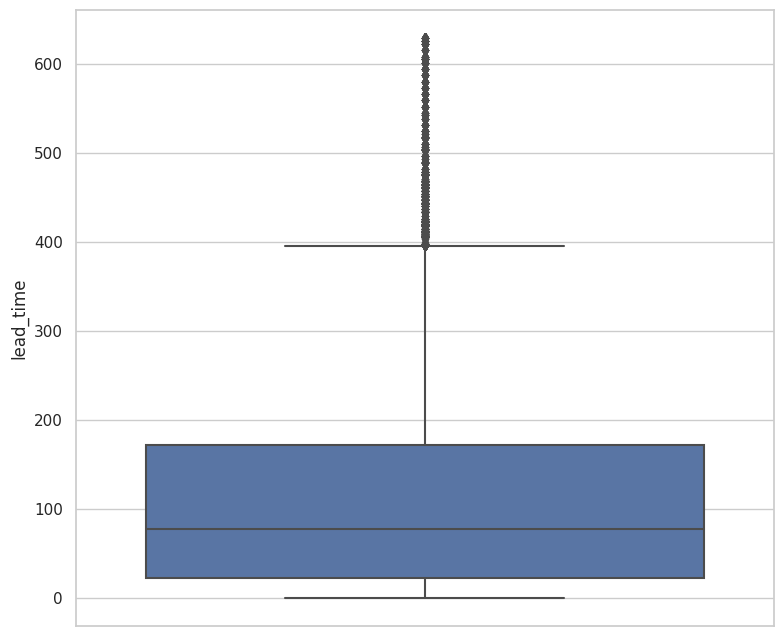

In [77]:

sns.boxplot(y=df_hotels_train.lead_time)
plt.show()

Se puede observar en este grafico que todos los valores que superen el 400 aproximadamente son considerados atipicos. 
Nos parece que con el grafico, podemos ver que apartir de 400 tenemos una cantidad exagerada de valores atipicos (en comparacion a todos los demas).
Tomammos entonces la decision de normalizar estos valores.

In [78]:
for i in range(len(df_zscore['z_lead_time'])):
  if df_zscore.z_lead_time[i] > 3:
    df_hotels_train.lead_time[i] = round(media_lead_time)

<ipython-input-78-6a0a74c2d425>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_train.lead_time[i] = round(media_lead_time)


Columna previous_cancellations

In [79]:
media_previous_cancellations=np.mean(df_hotels_train.previous_cancellations)
std_previous_cancellations=np.std(df_hotels_train.previous_cancellations)
df_zscore = pd.DataFrame()
df_zscore['z_previous_cancellations']=(df_hotels_train.previous_cancellations - media_previous_cancellations)/std_previous_cancellations
df_zscore[df_zscore['z_previous_cancellations']>3]

z_previous_cancellations
152                   26.048930
337                   19.004656
349                    3.909783
802                   26.048930
1579                  10.954057
...                         ...
59717                 13.973032
59761                 24.036280
59879                 10.954057
60138                 25.042605
60793                  3.909783

[162 rows x 1 columns]

Tenemos 162 valores, en este caso que pueden ser considerados como atipicos. Graficando vemos:

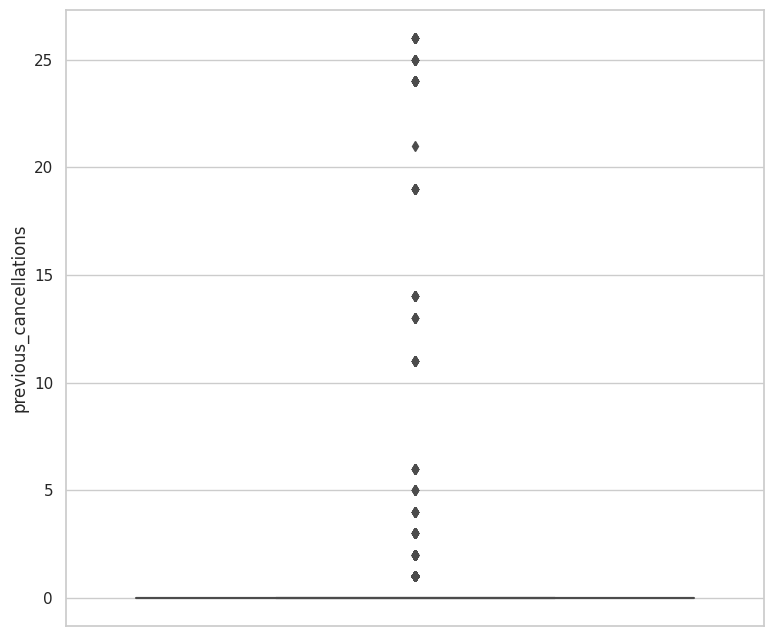

In [80]:
sns.boxplot(y=df_hotels_train.previous_cancellations)
plt.show()

Tenemos 162 valores detectados por zscore que son considerados atipicos debido a que la mayoria de valores es 0.

Normalizaremos entonces los valores que son mayores a 10, ya que estan muy por encima de la media. 

In [81]:
#Normalizamos previus cancellation
for i in range(len(df_hotels_train.previous_cancellations)):
  if df_hotels_train.previous_cancellations[i] > 10:
    df_hotels_train.previous_cancellations[i] = 0 #Redondeamos a 0 ya que no tiene sentido normilazarlos sacando una media

<ipython-input-81-66f8767a13d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_train.previous_cancellations[i] = 0 #Redondeamos a 0 ya que no tiene sentido normilazarlos sacando una media


Previous_booking_not_canceled

In [82]:
media_previous_bookings_not_canceled=np.mean(df_hotels_train.previous_bookings_not_canceled)
std_previous_bookings_not_canceled=np.std(df_hotels_train.previous_bookings_not_canceled)
df_zscore = pd.DataFrame()
df_zscore['z_previous_bookings_not_canceled']=(df_hotels_train.previous_bookings_not_canceled - media_previous_bookings_not_canceled)/std_previous_bookings_not_canceled
df_zscore[df_zscore['z_previous_bookings_not_canceled']>3]


z_previous_bookings_not_canceled
227                            5.646572
267                            4.214265
349                           12.091957
525                            5.646572
735                            4.930418
...                                 ...
61115                          8.511188
61142                          9.227342
61275                          5.646572
61410                          4.214265
61777                          9.227342

[395 rows x 1 columns]

Tenemos 395 valores atipicos, realizamos un grafico para observarlos mejor:

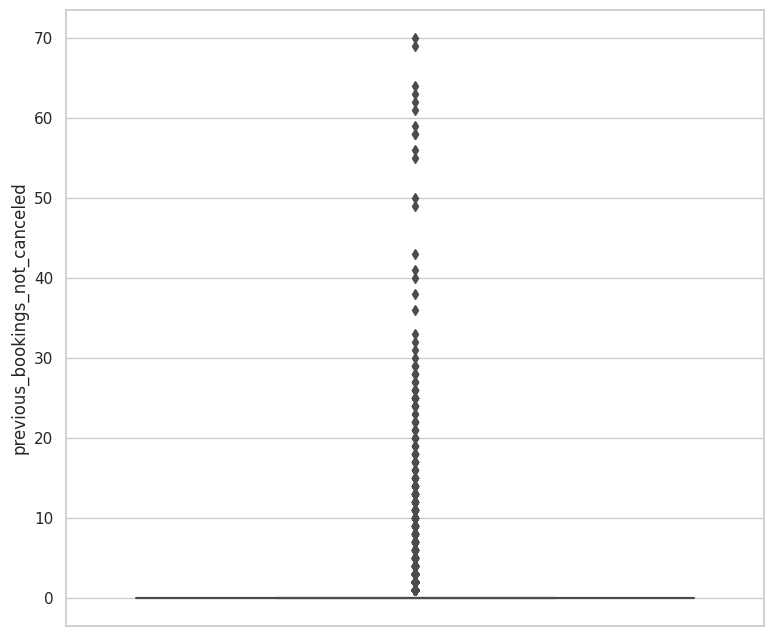

In [83]:
sns.boxplot(y=df_hotels_train.previous_bookings_not_canceled)
plt.show()

Tenemos un cantidad enorme que son 0, pero lo que vemos tambien es que cuando un poco mas grande que 30 empiezan a ser mucho menos frecuentes (cada vez tenemos menos ). Decidimos entonces normalizar apartir de los que son mayores que 30, ya que se observar que empizan a ser mas raros.

In [84]:
for i in range(len(df_hotels_train.previous_bookings_not_canceled)):
  if df_hotels_train.previous_bookings_not_canceled[i] > 30:
    df_hotels_train.previous_bookings_not_canceled[i] = round(media_previous_bookings_not_canceled)

<ipython-input-84-918a3d5ac988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_train.previous_bookings_not_canceled[i] = round(media_previous_bookings_not_canceled)


Columna booking_changes

In [85]:
media_booking_changes=np.mean(df_hotels_train.booking_changes)
std_booking_changes=np.std(df_hotels_train.booking_changes)
df_zscore = pd.DataFrame()
df_zscore['z_booking_changes']=(df_hotels_train.booking_changes - media_booking_changes)/std_booking_changes
df_zscore[df_zscore['z_booking_changes']>3]


z_booking_changes
83              4.592926
100             7.868851
211             7.868851
231             6.230888
700             4.592926
...                  ...
61679           4.592926
61722           6.230888
61746           4.592926
61806           6.230888
61818           6.230888

[701 rows x 1 columns]

Tenemos 701 valores atipicos en esta variable

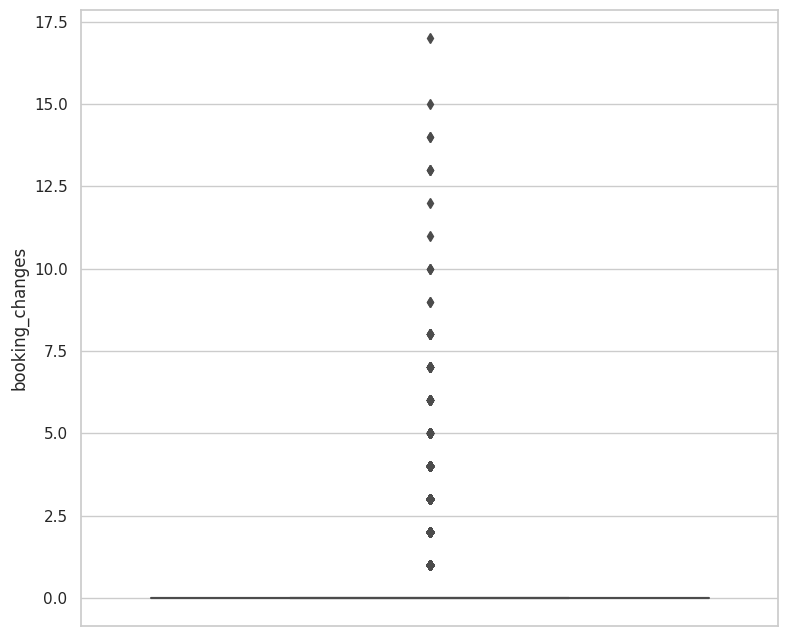

In [86]:
sns.boxplot(y=df_hotels_train.booking_changes)
plt.show()

En este grafico se  pensaria que los valores tienen una distancia "parecida" entre si, pero lo que realmente sucede, es que al tener tantos valores como 0, no se llega a mostrar la box-plot cuando la graficamos. ¿Cual decision es la correcta? bueno, a nosotros nos parece mejor usar la logica y establecer si son mayores a 10 ya pasan a ser "outliers" por lo tanto normalizaremos todos los valores mayores a 10.

In [87]:
#Normalizamos los valores atipicos de booking change
for i in range(len(df_hotels_train.booking_changes)):
  if df_hotels_train.booking_changes[i] > 10:
    df_hotels_train.booking_changes[i] = 0 #Redondeamos a 0 ya que no tiene sentido normilazarlos sacando una media

<ipython-input-87-83ddfe064c16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_train.booking_changes[i] = 0 #Redondeamos a 0 ya que no tiene sentido normilazarlos sacando una media


Columna days_in_waiting_list

In [88]:
media_days_in_waiting_list=np.mean(df_hotels_train.days_in_waiting_list)
std_days_in_waiting_list=np.std(df_hotels_train.days_in_waiting_list)
df_zscore = pd.DataFrame()
df_zscore['z_days_in_waiting_list']=(df_hotels_train.days_in_waiting_list - media_days_in_waiting_list)/std_days_in_waiting_list
df_zscore[df_zscore['z_days_in_waiting_list']>3]

z_days_in_waiting_list
11                   8.559080
52                   4.745760
76                   4.853177
155                  3.080789
206                  3.993837
...                       ...
61751                3.510458
61757                3.188206
61797               13.768829
61805                9.418420
61812                3.349332

[965 rows x 1 columns]

Encontramos 965 valores atipicos





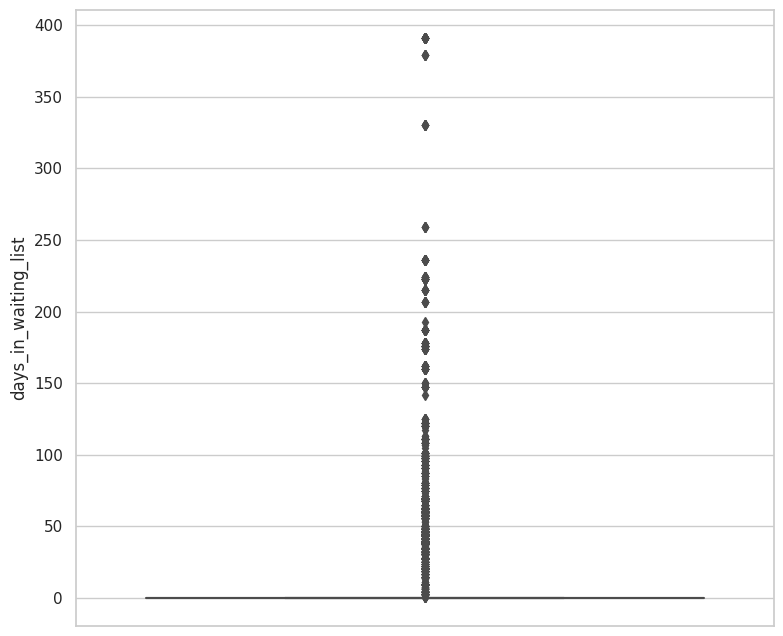

In [89]:
sns.boxplot(y=df_hotels_train.days_in_waiting_list)
plt.show()

Al igula que antes, tenemos una gran cantidad que estan en 0 por lo tanto no podemos mostrar nuestra box-plot. Analizando los valores vemos que apartir del 120 (aproximadamente) los valores de nuevo empiezan a parece cada vez mas raros (toman mas distancia entre si) en esta ocasion, ademas de los valores que separan 100 dias de espera, no nos parece algo normal pero vemos que al superar un poco esos 100 dias se empizan a distanciar los valores (hablando sobre los valores que podemos visualizar) normalizaremos entonces, todos los valores mayores a 100.

In [90]:
for i in range(len(df_hotels_train.days_in_waiting_list)):
  if df_hotels_train.days_in_waiting_list[i] > 100:
    df_hotels_train.days_in_waiting_list[i] = round(media_days_in_waiting_list)

<ipython-input-90-a772d6052ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_train.days_in_waiting_list[i] = round(media_days_in_waiting_list)


Columna required_car_parking_spaces

In [91]:
media_required_car_parking_spaces=np.mean(df_hotels_train.required_car_parking_spaces)
std_required_car_parking_spaces=np.std(df_hotels_train.required_car_parking_spaces)
df_zscore = pd.DataFrame()
df_zscore['z_required_car_parking_spaces']=(df_hotels_train.required_car_parking_spaces - media_required_car_parking_spaces)/std_required_car_parking_spaces
df_zscore[df_zscore['z_required_car_parking_spaces']>3]


z_required_car_parking_spaces
1                           4.298417
14                          4.298417
64                          4.298417
71                          4.298417
139                         4.298417
...                              ...
61816                       4.298417
61826                       4.298417
61833                       4.298417
61886                       4.298417
61890                       4.298417

[3072 rows x 1 columns]

Tenemos 3072 valores atipicos

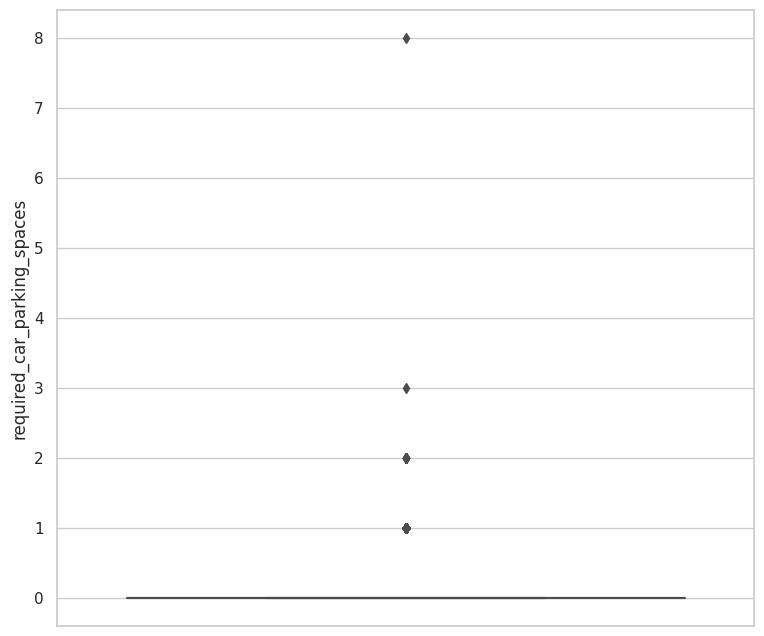

In [92]:
sns.boxplot(y=df_hotels_train.required_car_parking_spaces)
plt.show()

Este caso tambien es muy parecido a los anteriores y por el mismo motivo nos queda un rango muy chico en el boxplot, sin embargo consideramos que hasta 3 pueden ser valores normales teniendo en cuenta que nos referimos a espacios de estacionamiento.

Notamos que hay un valor bastante elevado separado de los demas y nos parece raro por lo tanto buscamos cuantos adultos tiene esa reserva para ver si tiene sentido esa cantidad de espacios de estacionamiento:




In [93]:
indice_valor_mas_alto =df_zscore.z_required_car_parking_spaces.idxmax()
print(df_hotels_train.adults.loc[indice_valor_mas_alto])

2


Vemos que esa reserva tiene unicamente 2 adultos por lo tanto no tendia sentido tener 8 espacios de estacionamiento. La normalizamos:

In [94]:
for i in range(len(df_hotels_train.required_car_parking_spaces)):
  if df_hotels_train.required_car_parking_spaces[i] > 7:
    df_hotels_train.required_car_parking_spaces[i] = round(media_required_car_parking_spaces)

<ipython-input-94-c6ce1a3d7261>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_train.required_car_parking_spaces[i] = round(media_required_car_parking_spaces)




# Análisis Multivariado :
Comparamos las variables adults y children


In [95]:
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

In [96]:
#Conjunto de entrenamiento
X=df_hotels_train[['adults','children']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=20)

#Genero prediccion
y_pred = clf.fit_predict(X)

#Guardo los scores
df_lof = pd.DataFrame()
df_lof['scores']=clf.negative_outlier_factor_

<ipython-input-97-21ea0229331b>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-97-21ea0229331b>:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


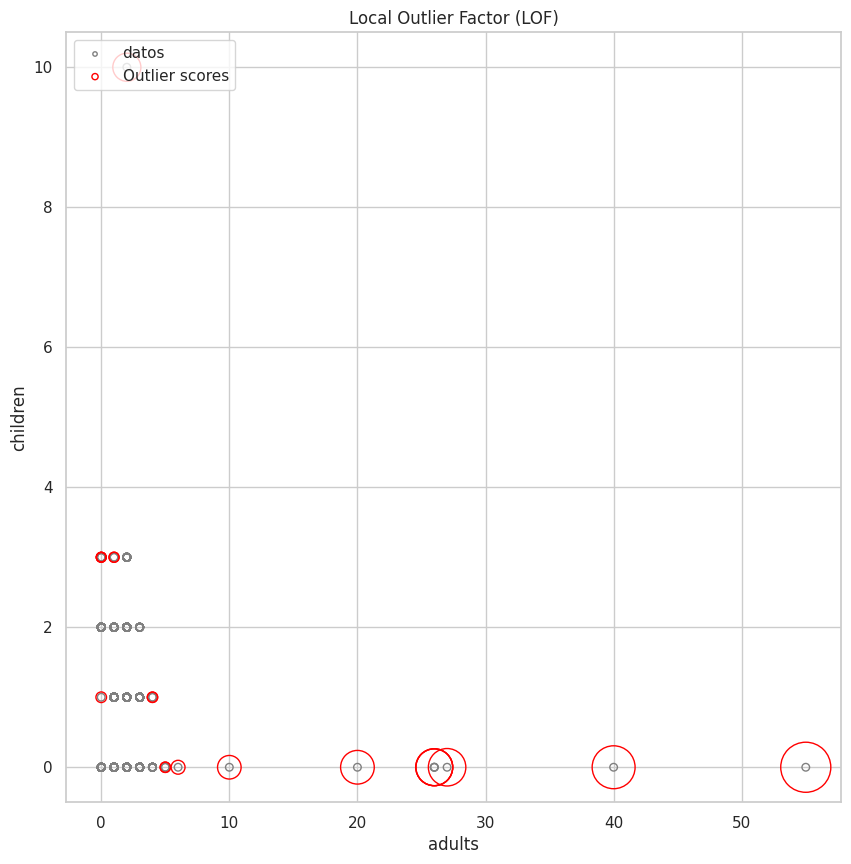

In [97]:
#Calculo radio para plotear score
radius = (df_lof.scores.max() - df_lof.scores) / (df_lof.scores.max() - df_lof.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df_hotels_train.adults.values,df_hotels_train.children.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(df_hotels_train.adults.values,df_hotels_train.children.values, s=1300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
plt.xlabel('adults')
plt.ylabel('children')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

En este grafico se puede ver que cuanto mas grande es el circulo rojo, mas atipico es el valor. Las reservas de mas de 5 adultos o niños son atipicas. Ademas se puede ver que son atipicas las reservas sin adultos pero con niños 

Comparamos las variables adults y babies:

In [98]:
#Conjunto de entrenamiento
X=df_hotels_train[['adults','babies']].values

#Creo el clasificador
clf = LocalOutlierFactor(n_neighbors=20)

#Genero prediccion
y_pred = clf.fit_predict(X)

#Guardo los scores
df_lof = pd.DataFrame()
df_lof['scores']=clf.negative_outlier_factor_


<ipython-input-99-21ea0229331b>:12: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
<ipython-input-99-21ea0229331b>:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


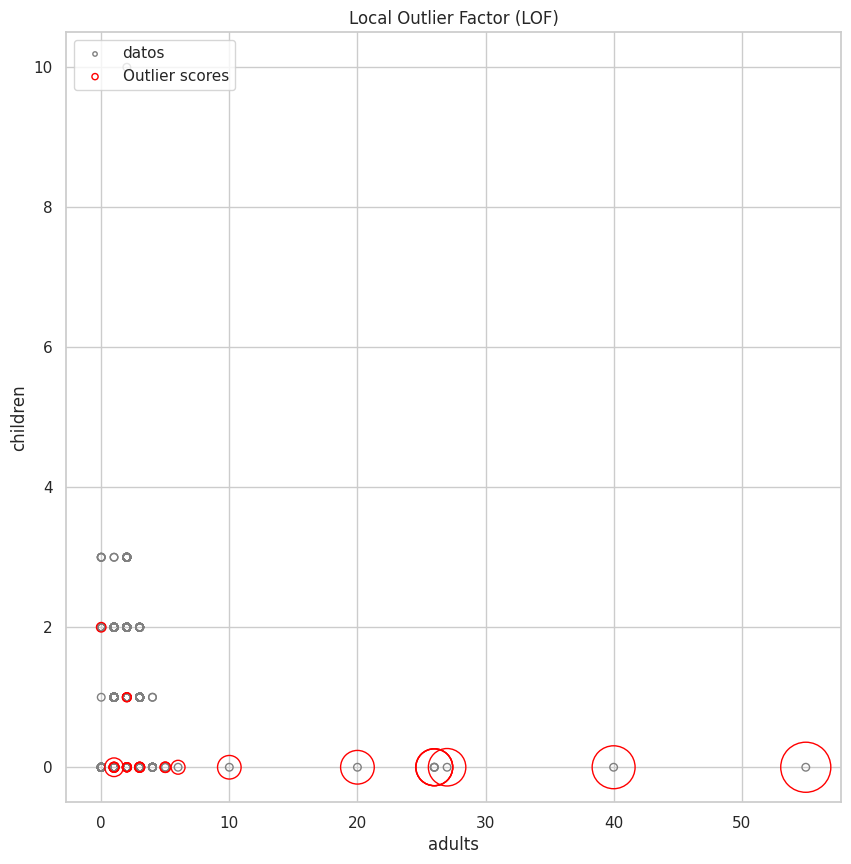

In [99]:
#Calculo radio para plotear score
radius = (df_lof.scores.max() - df_lof.scores) / (df_lof.scores.max() - df_lof.scores.min())

#Grafico LOF
plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(df_hotels_train.adults.values,df_hotels_train.children.values, edgecolor='grey', s=30, label='datos',facecolors='none')
plt.scatter(df_hotels_train.adults.values,df_hotels_train.children.values, s=1300 * radius, edgecolors='red',facecolors='none', label='Outlier scores')
plt.xlabel('adults')
plt.ylabel('children')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

En este grafico podemos ver a partir de 2 bebes un una reserva ya se puede considerar atipico y que, al igual que en la anterior comparacion, es atipico una reserva con bebes pero sin adultos

Decisiones sobre los valores atipicos en estas tres variables: Eliminamos las reservas que no tienen adultos porque nos parece que no tiene sentido y que debe haber sido causado por un error; Eliminamos la reserva que figura en el ultimo grafico que tiene muchos bebes pero pocos adultos porque tambien consideramos que debe ser un error; Por ultimo normalizamos las reservas de mas de 20 adultos porque tambien nos parece ilogico una reserva con tantos adultos.

In [100]:

df_hotels_train.reset_index(drop=True, inplace=True)
for i in range(len(df_hotels_train)):
  if df_hotels_train.adults[i] == 0:
    df_hotels_train = df_hotels_train.drop(index = [i])

df_hotels_train.reset_index(drop=True, inplace=True)


In [101]:
df_hotels_train.reset_index(drop=True, inplace=True)
for i in range(len(df_hotels_train)):
  if df_hotels_train.adults[i] <= 2 and df_hotels_train.babies[i] >= 8:
    df_hotels_train = df_hotels_train.drop(index = [i])
    

df_hotels_train.reset_index(drop=True, inplace=True)



In [102]:
media_adults=np.mean(df_hotels_train.adults)

for i in range(len(df_hotels_train)):
  if df_hotels_train.adults[i] >= 25:
    df_hotels_train.adults[i] = round(media_adults)

<ipython-input-102-8ab05d604988>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_train.adults[i] = round(media_adults)


Comparamos las variables stays_in_weekend_nights y stays_in_week_nights:

Isolation Forest:


In [103]:
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=2, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [104]:
df_if = pd.DataFrame()

df_if['stays_in_weekend_nights']= df_hotels_train.stays_in_weekend_nights
df_if['stays_in_week_nights']= df_hotels_train.stays_in_week_nights


pred= iforest.fit_predict(df_if[['stays_in_weekend_nights','stays_in_week_nights']])


df_if['scores']=iforest.decision_function(df_if[['stays_in_weekend_nights','stays_in_week_nights']])
df_if['outlier_label']=pred


df_if[df_if.outlier_label==-1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


stays_in_weekend_nights  stays_in_week_nights    scores  outlier_label
5                            3                     5 -0.039820             -1
6                            4                     9 -0.115117             -1
81                           3                     5 -0.039820             -1
94                           4                     8 -0.106870             -1
112                          4                     6 -0.111555             -1
...                        ...                   ...       ...            ...
61552                        2                     8 -0.055259             -1
61573                        0                     0 -0.027091             -1
61642                        5                    11 -0.148590             -1
61667                        4                    10 -0.117783             -1
61683                        2                     7 -0.025257             -1

[2929 rows x 4 columns]

In [105]:
df_if.outlier_label.value_counts()

 1    58786
-1     2929
Name: outlier_label, dtype: int64

Tenemos 2974 reservas que en estas variables pueden ser consideradas como atipicas

In [106]:
def create_scatter(df, col1, col2, col3, sample_pct=1):
    sample_size = math.ceil(sample_pct * df.shape[0])
    fig, ax = plt.subplots()
    for t, data in df[[col1, col2, col3]].sample(sample_size).groupby(col3):
      ax.scatter(data[col1], data[col2], label=t, alpha=0.3)

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.show()

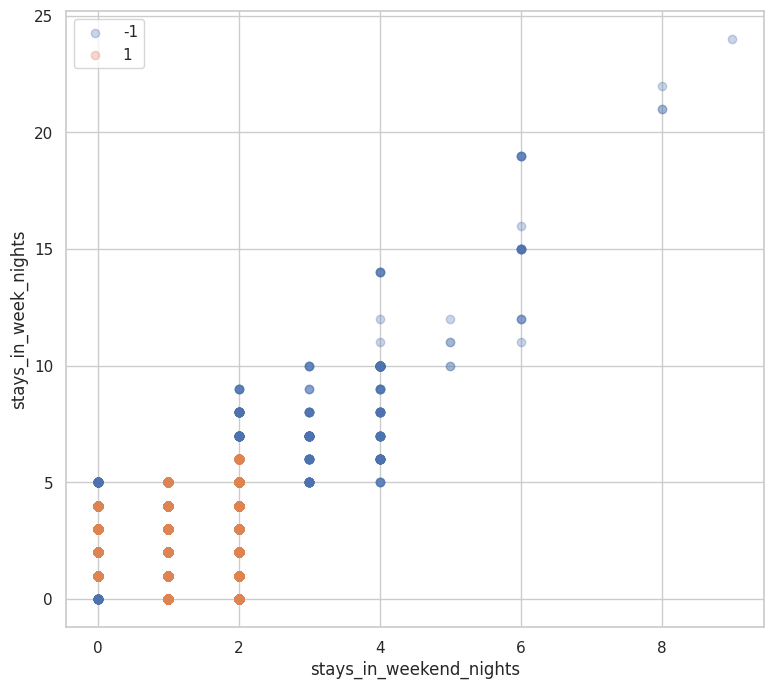

In [107]:
create_scatter(df_if, 'stays_in_weekend_nights','stays_in_week_nights', 'outlier_label', 0.15)

En este grafico podemos ver que todos los puntos azules son valores atipicos y se puede notar que cuanto menos colorido es el azul, mas atipico es el valor. En promedio, por cada 5 noches de semana en la reserva deberia haber 2 noches de fin de semana formando una funcion lineal y podemos notar que cuanto mas separados estan los puntos de esta funcion menos coloridos son y por lo tanto mas atipicos son sus valores. Tambien vemos que el (0,0) esta considerado como atipico porque no tiene sentido una reserva de 0 dias.

In [108]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

estimator = iforest.estimators_[5]

export_graphviz(estimator,out_file='tree.dot',max_depth=5,
                feature_names = ['stays_in_weekend_nights','stays_in_week_nights'],
                special_characters=True,rounded=True,precision=2)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

De estas variables eliminaremos unicamente aquellos valores que sean 0 en stays_in_week_nights y 0 en stays_in_weekend_nights porque una reserva de 0 noches no tiene sentido por lo tanto debe ser un error.

In [109]:
df_hotels_train.reset_index(drop=True, inplace=True)

for i in range(len(df_hotels_train)):
  if df_hotels_train.stays_in_week_nights[i] == 0 and df_hotels_train.stays_in_weekend_nights[i] == 0:
    df_hotels_train = df_hotels_train.drop(index = [i])

df_hotels_train.reset_index(drop=True, inplace=True)


Conclusiones finales
Tenemos una cantidad muy grande de valores atipicos, pero como sabemos no todo valor a tipico es un outlier. Sabiendo esto, tratamos de predicir que valor sera outlier o no analizando las columnas, observando los graficos y tratando de que tenga la mayor logica posible. En los casos que vimos comveniente, remplazamos los valores por si "valor mas frecuente" y en otros directamente eliminamos las filas.

##Arboles de decision

Para esta parte del tp buscaremos crear arboles de decision y optimizar sus hiper parametros, buscando la mejor perfomance posible

In [110]:
!pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz

from sklearn import tree
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder
) 

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Como ya realizamos un analisis extenso de nuetras variables, sus tipos de datos, valor faltantes, etc. Tendremos que decidir que variables consideraderomos en el analisis para nuestro arbol

In [112]:
eliminar_columnas = ['id'] # -> Recordar que el id lo vamos a necesitar para machear en kaggle
                                                                      
df_hotels_train.drop(eliminar_columnas, axis='columns', inplace=True)
df_hotels_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled']

Para poder realizar los arboles tendremos que hacer un one hot enconding a nustrar variables categoricas

In [113]:
# Realizamos el one hot encoding, con scikit learn.
# Por cada columna a encodear, hacer un fit transform. Dropear la columna, y agregar las columnas nuevas con el nombre adecuado
df_hotels_train_to_encode = df_hotels_train.copy()
cols_a_encodear = ['hotel','arrival_date_month','customer_type','meal', 'distribution_channel','market_segment', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'country']
ohe = OneHotEncoder(drop='first', handle_unknown='infrequent_if_exist') # Siempre se elimina la primera columna, o el feature entero si solo tiene un valor (no aporta informacion).
transformer = make_column_transformer(
    (ohe, cols_a_encodear),
    remainder='passthrough',
    verbose_feature_names_out=False
)


In [114]:
hotels_train_encoded = transformer.fit_transform(df_hotels_train_to_encode.drop('is_canceled', axis=1)) # Se dropea is_canceled, porque no hace falta encodearlo, y ademas la instancia de test no va a tener esa columna.

In [115]:
df_hotels_train_encoded = pd.DataFrame(
    hotels_train_encoded.toarray(), 
    columns=transformer.get_feature_names_out()
)

#Mostramos las primera 10 columnas de country, ya que el resto tiene una cantidad bajisima de datos y no aportan demasiado
country_cols = df_hotels_train_encoded.columns[df_hotels_train_encoded.columns.str.startswith('country_')]
selected_columns = (df_hotels_train_encoded[country_cols] != 0).sum()
top_cols = selected_columns.nlargest(10).index
other_countries = [col for col in country_cols if col not in top_cols]
df_hotels_train_encoded['country_other'] = df_hotels_train_encoded[other_countries].sum(axis=1)
df_hotels_train_encoded.drop(other_countries, axis=1, inplace=True)   

In [116]:
#Creo un dataset con los features que voy a usar para clasificar
df_hotels_train_x = df_hotels_train_encoded

#Creo un dataset con la variable target
df_hotels_train_y = df_hotels_train['is_canceled'].copy()

#Genero los conjuntos de train y test]
x_train, x_test, y_train, y_test = train_test_split(df_hotels_train_x, 
                                                    df_hotels_train_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

Mostramos los datasets

In [117]:
x_train.head(2)

hotel_Resort Hotel  arrival_date_month_August  \
21319                 0.0                        0.0   
29452                 0.0                        0.0   

       arrival_date_month_December  arrival_date_month_February  \
21319                          0.0                          0.0   
29452                          0.0                          0.0   

       arrival_date_month_January  arrival_date_month_July  \
21319                         0.0                      1.0   
29452                         0.0                      0.0   

       arrival_date_month_June  arrival_date_month_March  \
21319                      0.0                       0.0   
29452                      0.0                       0.0   

       arrival_date_month_May  arrival_date_month_November  ...  \
21319                     0.0                          0.0  ...   
29452                     0.0                          0.0  ...   

       previous_cancellations  previous_bookings_not_canceled  \
21319                     0.0                             0.0   
29452                     0.0                             0.0   

       booking_changes  agent  company  days_in_waiting_list    adr  \
21319              0.0    9.0  -9999.0                   0.0  170.0   
29452              1.0    9.0  -9999.0                   0.0   85.5   

       required_car_parking_spaces  total_of_special_requests  country_other  
21319                          0.0                        1.0            0.0  
29452                          0.0                        1.0            0.0  

[2 rows x 80 columns]

In [118]:
y_train.head(2)

21319    1
29452    0
Name: is_canceled, dtype: int64

In [119]:
#Creamos clasf y entrenamos el modelo
tree_model = tree.DecisionTreeClassifier(max_depth = 10) # -> clasificador

model = tree_model.fit(X = x_train, y = y_train)  # -> lo entreno

In [120]:
y_pred = model.predict(x_test)

Mostramos el test vs nuestras predicts

In [121]:
ds_resultados = pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head(20)

test  pred
0      1     1
1      1     0
2      1     1
3      0     0
4      1     1
5      1     1
6      0     0
7      1     0
8      0     0
9      0     0
10     0     0
11     1     1
12     0     0
13     0     0
14     0     1
15     0     0
16     1     1
17     1     1
18     0     0
19     0     0

Creamos la matriz de confusion y la mostramos

Text(78.75, 0.5, 'True')

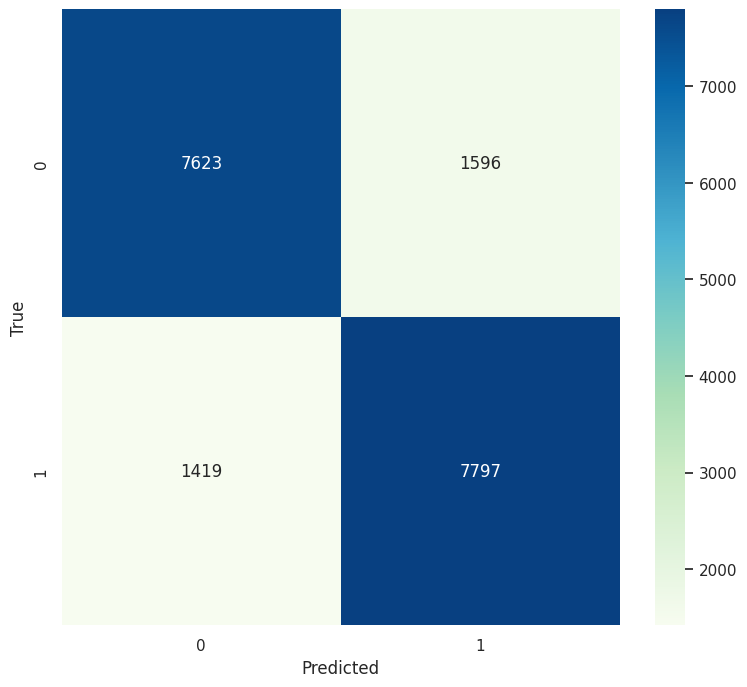

In [122]:
mat_c=confusion_matrix(y_test, y_pred) # -> Tabla con los valores, buscamos calcular verdaderos pos, falsos pos, etc

sns.heatmap(mat_c,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Aqui observamos cuanto acerto el modelo y cuanto se equivoco con respecto al test, si buscaramos hacer las cuentas a mano de recall y presicion :

Precision = (Tp / (Tp + Fp)) =( 8029 / ( 8029 + 1777)) ≈ 0.82

Recall = (Tp / (Tp + Fn) ) = (8029 / ( 8029 + 1304 )) ≈ 0. 86

Mostramos las metricas de nuestro conjunto

In [123]:
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred,)
precision = precision_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("Precision: "+str(precision))
print("f1 score: "+str(f1)) #Me mide el balance entre el recall y la precision 

Accuracy: 0.8364524003254679
Recall: 0.8460286458333334
Precision: 0.8300862344298946
f1 score: 0.8379816217959053


Graficamos el árbol

In [124]:
model.classes_

array([0, 1])

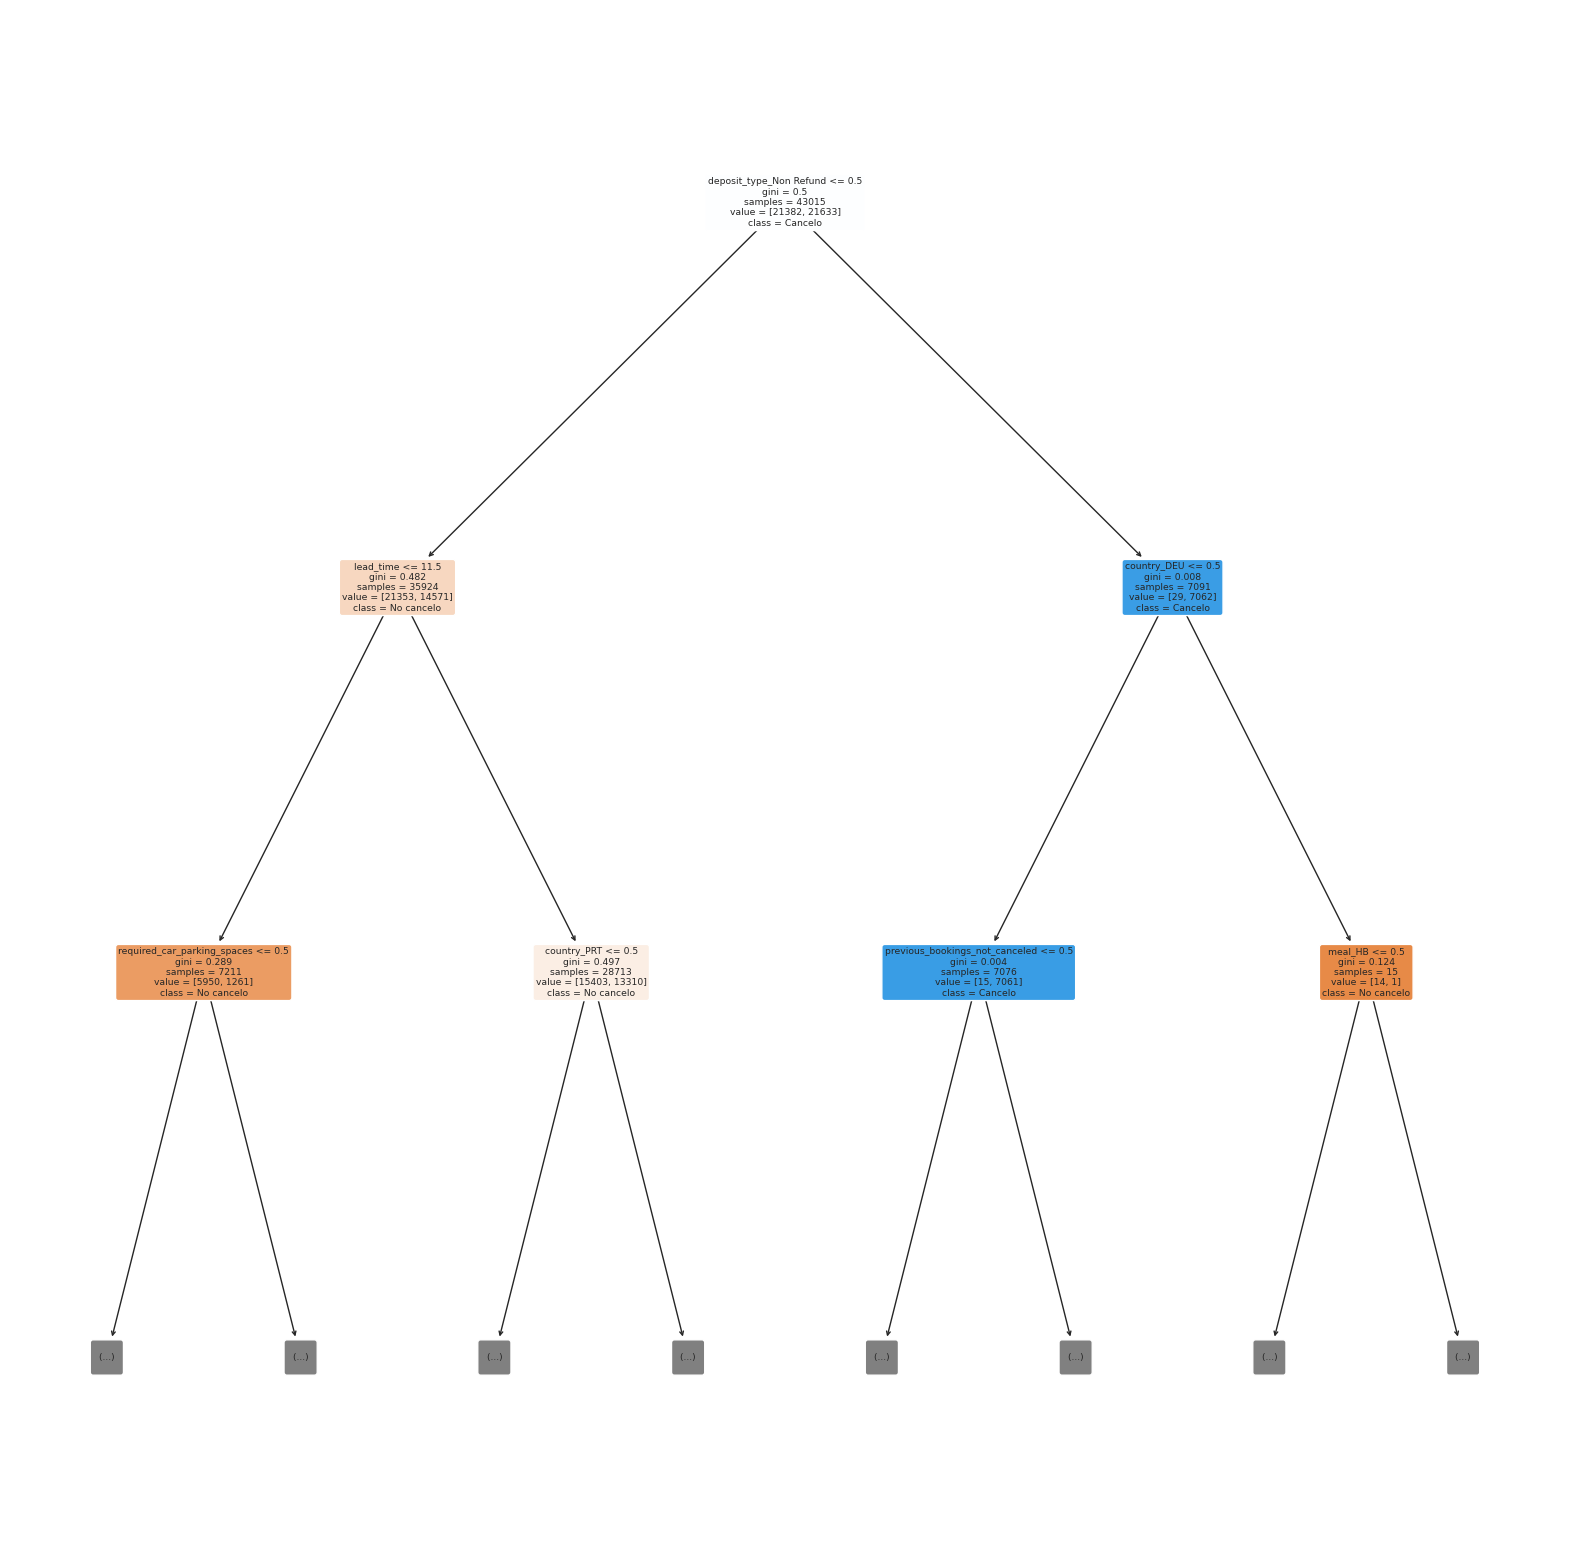

In [125]:
plt.figure(figsize=(20,20))

tree_plot_completo=tree.plot_tree(model,
                                  max_depth=2, # Mostramos una profundidad de 2, ya que el arbol es gigante
                                 feature_names=df_hotels_train_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['No cancelo','Cancelo']) #model.classes_
plt.show(tree_plot_completo)

Tenemos un arbol exageradamente grande, el cual tiene varias hojas que seguramente no esten aportando nada al analisis.
Por lo tanto ,observemos cuales son los atributos mas importantes para nuestro analisis y recortaremos el arbol (haremos una poda).

In [126]:
#sorted(list(zip(df_hotels_train_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

Tenemos una cantidad gigante de atributos que aportan poco (algunos nada) a nuestro analisis, vamos arealizar una poda del arbol

In [127]:
#Creo un clasificador 
arbol_poda = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=10, 
                                         ccp_alpha=0.01)
#Entreno un modelo
model_poda = arbol_poda.fit(X = x_train, y = y_train)

#Hago una predicción
y_pred_poda = model_poda.predict(x_test)

#Visualizo los resultados en un dataframe
df_hotels_train_resultados_poda = pd.DataFrame(zip(y_test,y_pred_poda),columns=['test','pred'])
df_hotels_train_resultados_poda.head()

test  pred
0     1     1
1     1     0
2     1     1
3     0     0
4     1     1

Volvemos a crear la matriz de confusion 

Text(78.75, 0.5, 'True')

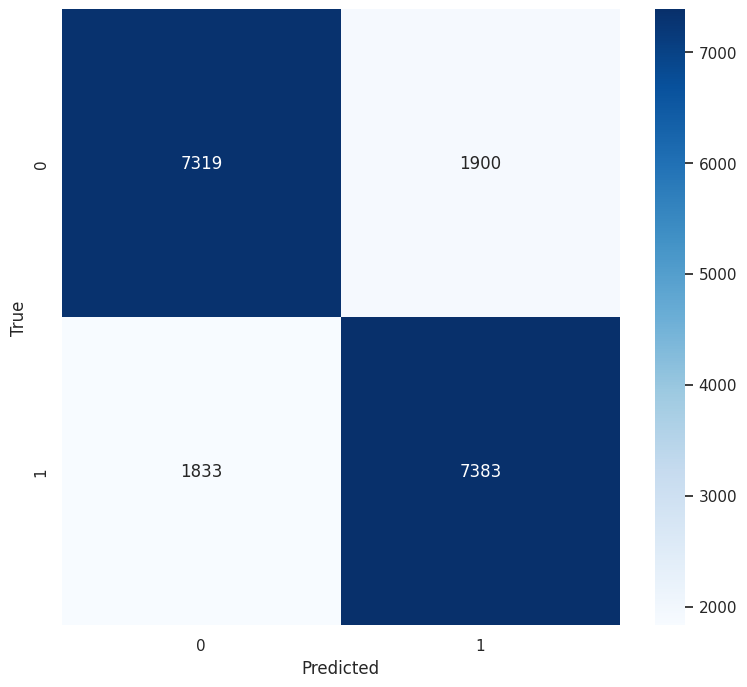

In [128]:
#Creo matriz de confusión
tabla = confusion_matrix(y_test,y_pred_poda)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [129]:
accuracy_poda = accuracy_score(y_test,y_pred_poda)
recall_poda = recall_score(y_test,y_pred_poda)
f1_poda=f1_score(y_test,y_pred_poda)
precision_poda = precision_score(y_test,y_pred_poda)

print("Precision: "+str(precision))
print("Accuracy: "+str(accuracy_poda))
print("Recall: "+str(recall_poda))
print("f1 score: "+str(f1_poda))

Precision: 0.8300862344298946
Accuracy: 0.7975047464062924
Recall: 0.8011067708333334
f1 score: 0.7982053083950483


Observamos, que si bien bajan nuestras metricas, obtenemos un resultado muy parecido ( usando muchos menos valores)

Mostramos nuestro nuevo arbol con la poda realizada

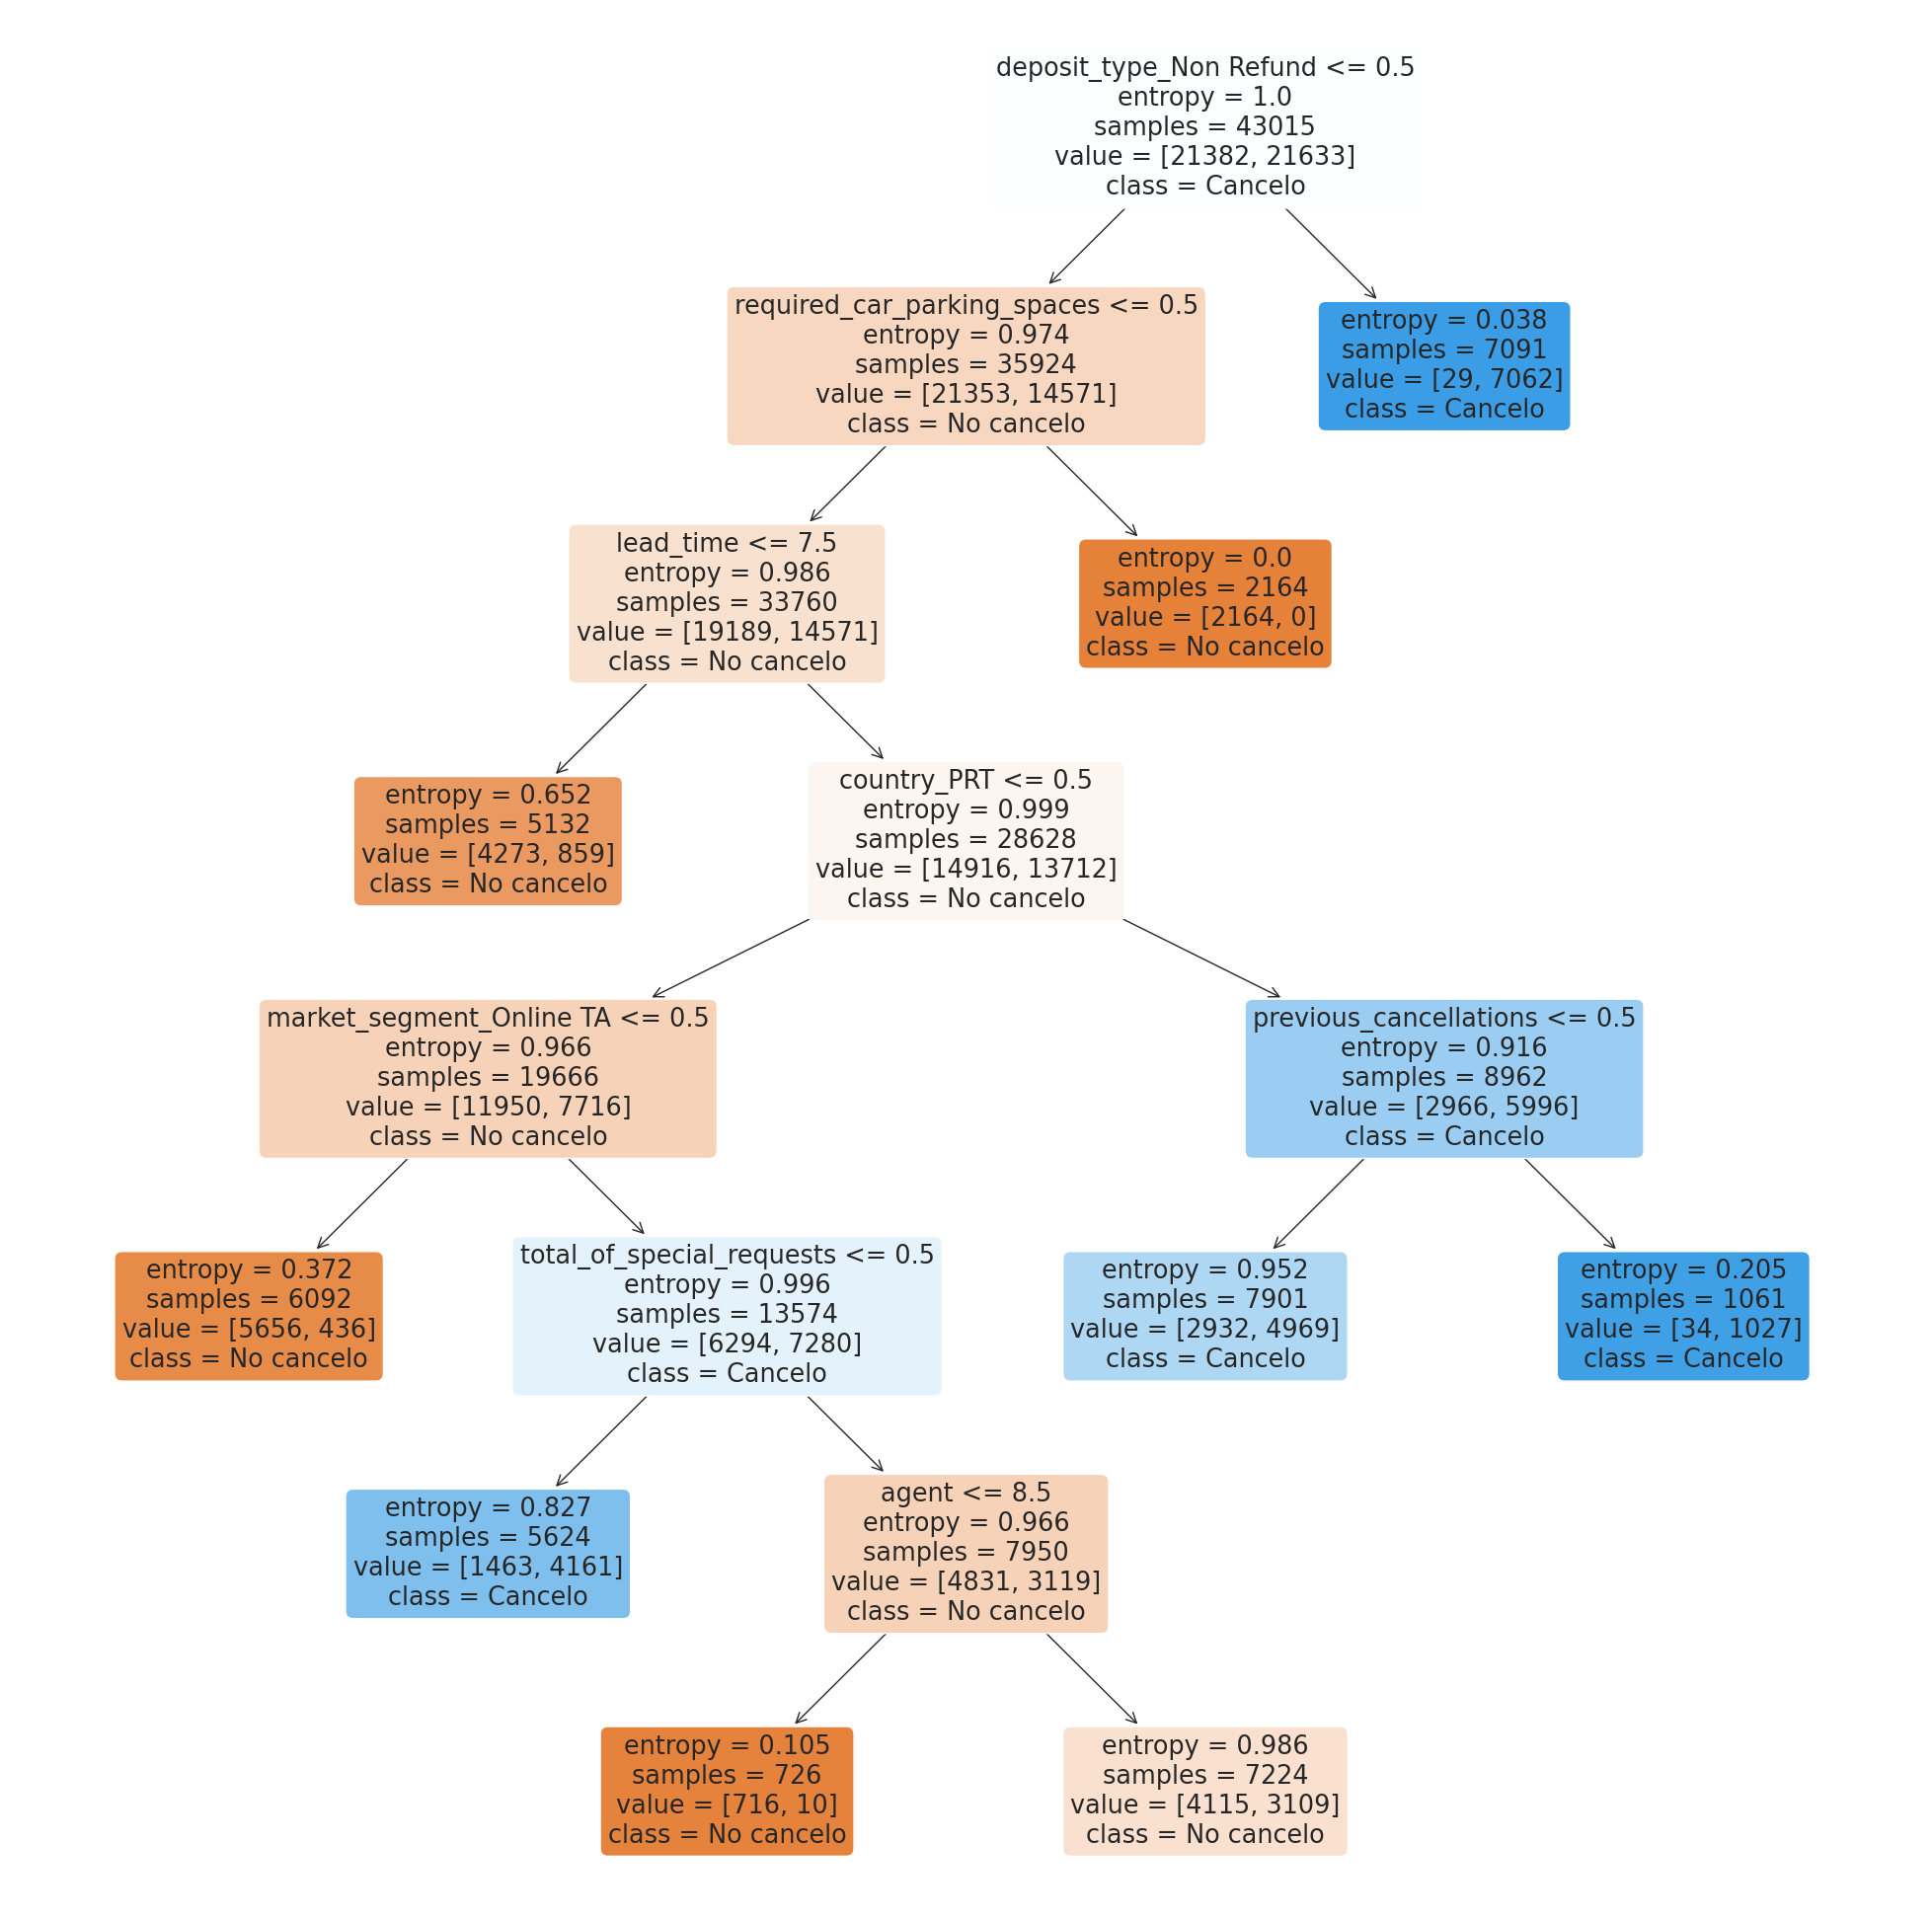

In [130]:
plt.figure(figsize=(25,25))

tree_plot_completo = tree.plot_tree(model_poda,
                                 feature_names=df_hotels_train_x.columns.to_list(),
                                 filled=True,
                                 class_names=['No cancelo','Cancelo'],
                                 rounded=True,)
plt.show(tree_plot_completo)

Observamos que, haciendo una poda del arbol obtenemos un resultado bastante parecido al anterior. Utilizando muchos menos datos

## Busqueda de Hiperparametros

En esta etapa buscaremos mejorar la perfomance de nuestro arbol. A tra vez de la busqueda de hiper parametros

In [131]:
#Usamos el encode realizado al principio (recordar que no conserva la variable target)
df_encode_hipers_params = df_hotels_train_encoded 
df_target = df_hotels_train['is_canceled'].copy()  # -> creamos un dataset con nuestra variable target

In [132]:
# Dividimos el dataset

variables_a_utilizar = df_encode_hipers_params.columns.tolist()
target = ['is_canceled']

Muestro el balanceo de clases

In [133]:
df_target.value_counts(normalize=True)*100

1    50.20179
0    49.79821
Name: is_canceled, dtype: float64

Separo en un set de evaluacion

In [134]:
from sklearn.model_selection import train_test_split

x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(
                                                    df_encode_hipers_params[variables_a_utilizar].values, 
                                                    df_target.values, 
                                                    test_size = 0.2,    # -> 20% para test
                                                    random_state = 15,  # -> para que funcione el exp

                                                    stratify = df_target.values) # -> Mantengo la proporcion

# Verifico cantidad de datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train_h)))
print('# Datos Prueba: {}'.format(len(x_test_h)))



#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train_h.flatten(),y_test_h.flatten()]): # -> Usamos .flatten para que y_test y t_train sean unidimensionales
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 49160
# Datos Prueba: 12290
% Positivos Entrenamiento: 50.201
% Positivos Prueba: 50.203


Vemos que se mantiene a proporcion cuando creamos el set

Buscamos los hiper params  que mejor perfomen. Buscaremos optimizar F1 score, ya que de esa manera optimizaremos precision y recall. Utilizaremos random search , cross validation y k-f 

Elijiremos : poda, criterio y profundidad para buscar el arbol

In [135]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que voy a probar
n =  15

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'], #Criterio
               'ccp_alpha':np.linspace(0,0.005,n),  #Poda
               'max_depth':list(range(1,9))} # Definimos profuncidad
                

#Cantidad de splits para el Cross Validation
folds = 5

#Hacemos que respete la proporcion
kfoldcv = StratifiedKFold( n_splits = folds ) 


#Clasificador
base_tree = DecisionTreeClassifier() 


#Metrica que quiero optimizar 
scorer_fn = make_scorer(sk.metrics.f1_score) 


# Usamos random search y cross validation
randomcv = RandomizedSearchCV(estimator = base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 


#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train_h,y_train_h)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'ccp_alpha': array([0.        , 0.00035714, 0.00071429, 0.00107143, 0.00142857,
       0.00178571, 0.00214286, 0.0025    , 0.00285714, 0.00321429,
       0.00357143, 0.00392857, 0.00428571, 0.00464286, 0.005     ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
                   scoring=make_scorer(f1_score))

Encontramos nuestro mejor arbol realizando 15 combinaciones y utilizando 5 folds (ademas de los datos en poda, profundidad y criterio).
Mostramos nuestros mejores resultados

In [136]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.0014285714285714286}
0.8123712893046908


Mostramos los atributos que fueron de mayor importancia durante la busqueda de hiper parametros

In [137]:
mejor_arbol = randomcv.best_estimator_
importnacia_de_atributos = mejor_arbol.feature_importances_

for importnacia_de_atributos,feat in sorted(zip(importnacia_de_atributos,variables_a_utilizar)):
  if importnacia_de_atributos>0:
    print('#{}: {}'.format(feat,importnacia_de_atributos))
    print('')

#market_segment_Direct: 0.009069267069350732

#booking_changes: 0.014121345368906543

#arrival_date_year: 0.017191660247007558

#previous_cancellations: 0.02045769712478462

#agent: 0.0494771570119464

#required_car_parking_spaces: 0.05235054446424454

#total_of_special_requests: 0.08532369465638914

#country_PRT: 0.0869138443973198

#lead_time: 0.09438464031512184

#market_segment_Online TA: 0.1663004472063219

#deposit_type_Non Refund: 0.40440970213860694



Creamos el arbol con los mejores hiper parametros que encontramos

In [138]:
from sklearn.tree import export_text

arbol = DecisionTreeClassifier().set_params(**randomcv.best_params_)
arbol.fit(x_train_h,y_train_h) #Entrenamos el arbol en todo el set

reglas = export_text(arbol, feature_names= list (variables_a_utilizar))
print(reglas)

|--- deposit_type_Non Refund <= 0.50
|   |--- lead_time <= 8.50
|   |   |--- class: 0
|   |--- lead_time >  8.50
|   |   |--- country_PRT <= 0.50
|   |   |   |--- market_segment_Online TA <= 0.50
|   |   |   |   |--- market_segment_Direct <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- market_segment_Direct >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- market_segment_Online TA >  0.50
|   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |--- required_car_parking_spaces <= 0.50
|   |   |   |   |   |   |--- agent <= 8.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- agent >  8.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- required_car_parking_spaces >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |   |--- agent <= 8.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- agent >  8.50
|   |   |   |   |   |   |---

Graficamos nuestro mejor arbol

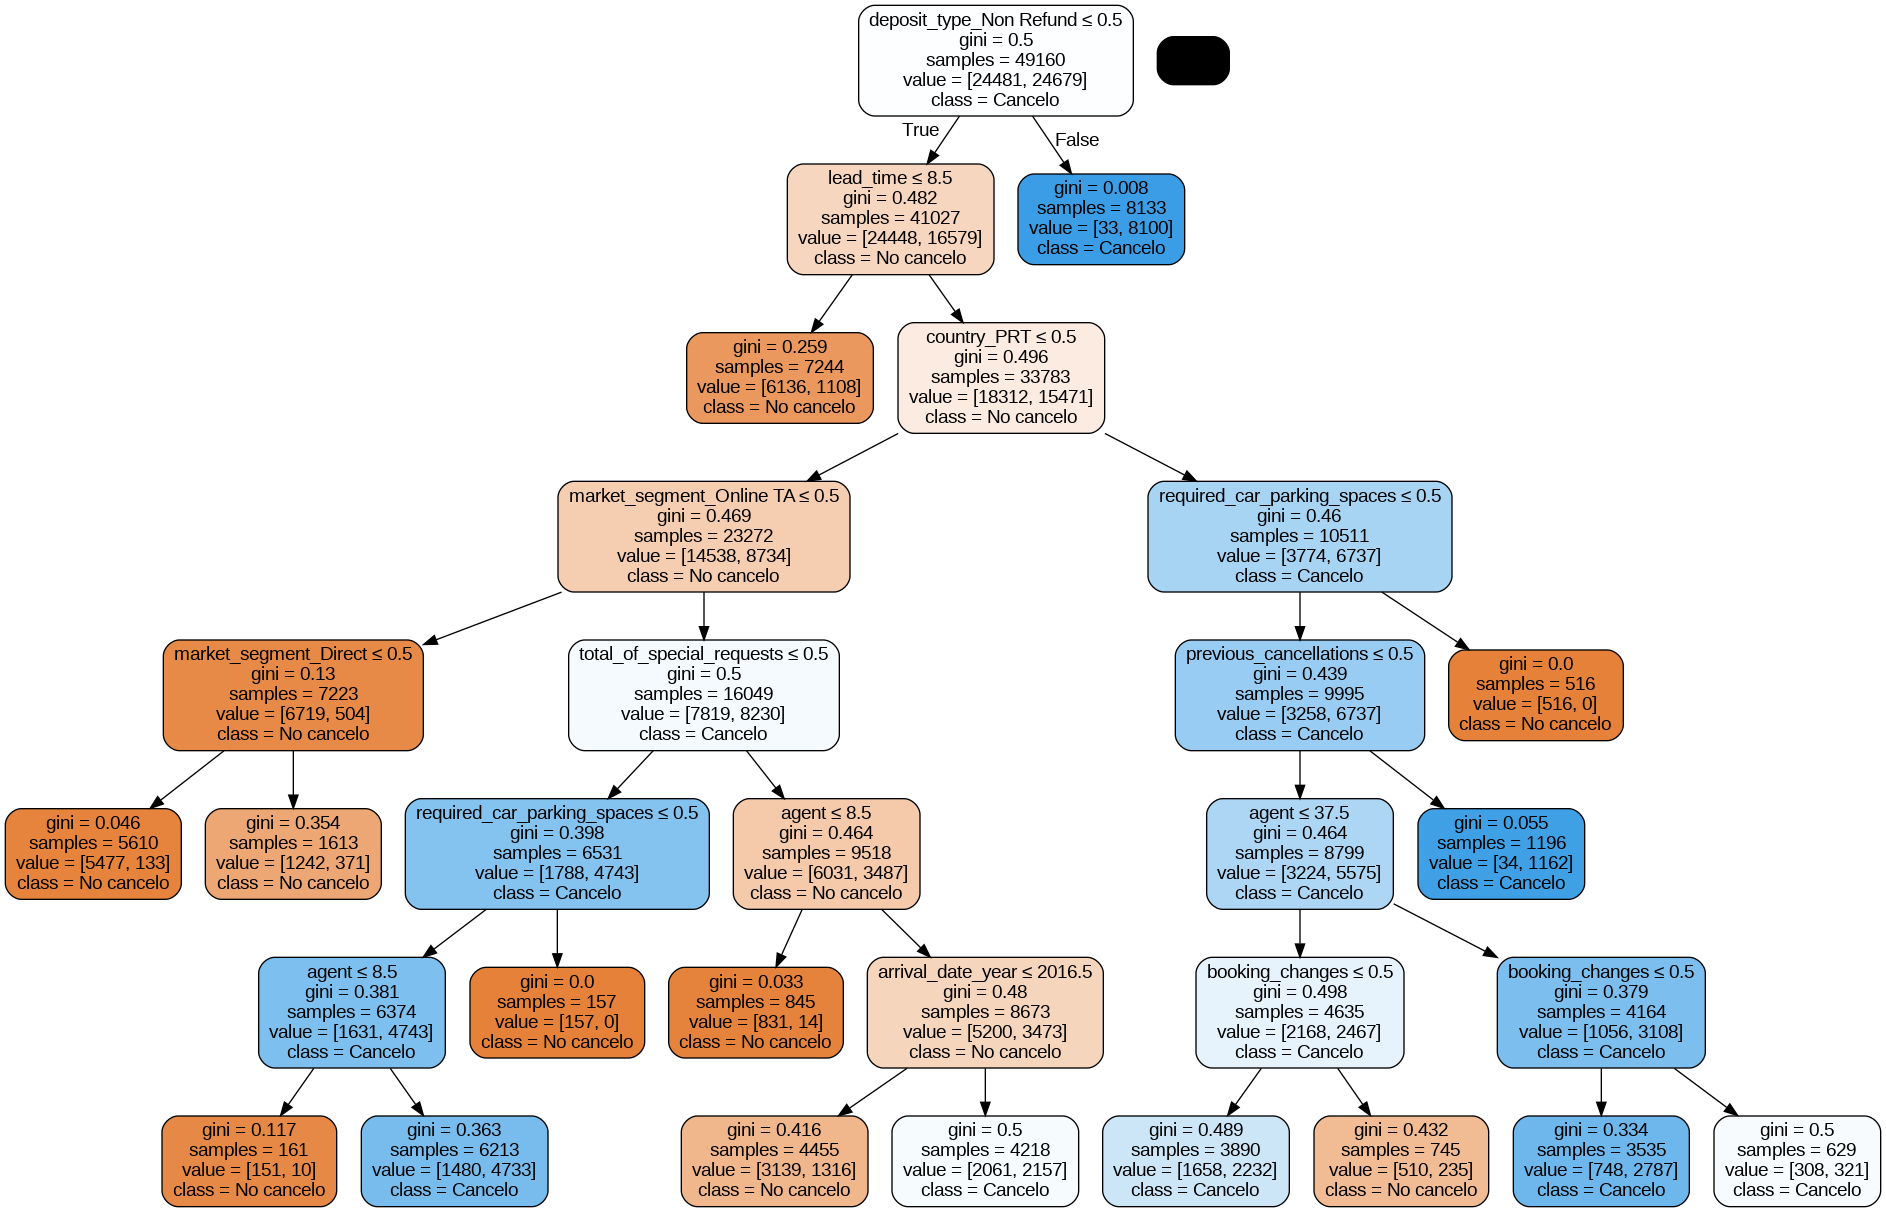

In [139]:
from six import StringIO
from IPython.display import Image 
import pydotplus

dot_data = StringIO()

export_graphviz(
                arbol, out_file=dot_data,  
                filled=True, rounded=True,

                special_characters=True,
                feature_names = variables_a_utilizar,

                class_names=['No cancelo','Cancelo'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Las primeras reglas nos dicen, si deposit_type_non_refund <= 0.50 si, entonces pregunto si lead_time <= 8.5 si las respuesta es si centonces pregunta required_parking_spaces y asi sucesivamente hasta que en algun momento llegue a si se cancela o no la reserva. 
Si por otro lado las repuesta deposit_ty_non_refund hubiera sido no (false), se cancela la reserva sin seguir preguntando

Llegamos entonces a un arbol mucho mas chico que el que teniamos inicialmente, con esto vemos la importancia de los atributos, ademas de que aumento nuestro f-1 score, pudimos realizar una poda y achicar el arbol.

Evaluo el arbol con los mejores hiper parametros en nuestro test de evaluacion para comprobar que performe correctamente

F1-Score: 0.814607167209637


Text(78.75, 0.5, 'True')

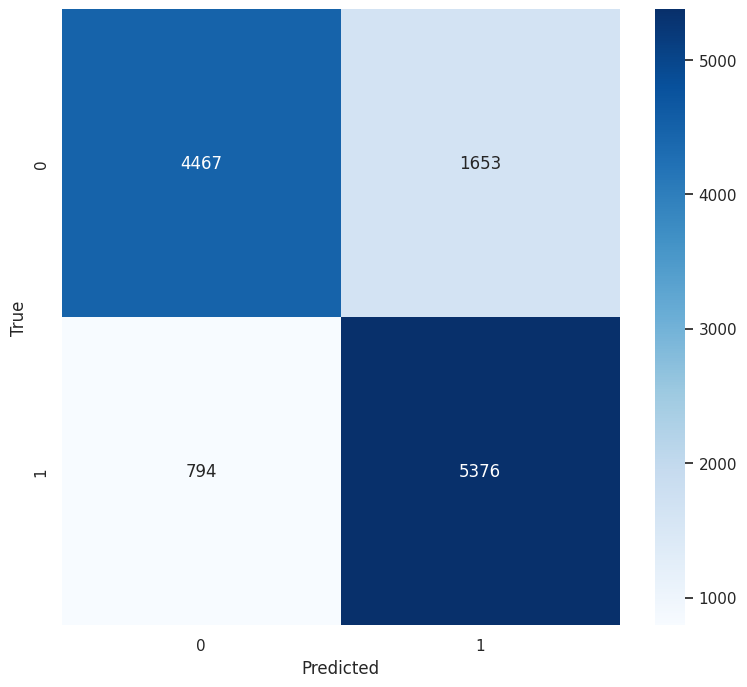

In [140]:
y_pred_h= arbol.predict(x_test_h) #Realizo una prediccion sobre el test de evaluacion

#Muestro la matriz de confusion y los reportes
print('F1-Score: {}'.format(f1_score(y_test_h, y_pred_h, average='binary'))) 

cm = confusion_matrix(y_test_h,y_pred_h)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Vemos que el arbol funciono bien en el predic en el test de evaluacion a continuacion mostramos todas nuestras metricas


In [141]:
accuracy_h = accuracy_score(y_test_h,y_pred_h)
recall_h = recall_score(y_test_h,y_pred_h)

f1_h = f1_score(y_test_h,y_pred_h)
precision_h = precision_score(y_test_h,y_pred_h)

print("Precision: "+str(precision_h))
print("Accuracy: "+str(accuracy_h))
print("Recall: "+str(recall_h))
print("f1 score: "+str(f1_h))

Precision: 0.7648314127187367
Accuracy: 0.8008950366151343
Recall: 0.8713128038897893
f1 score: 0.814607167209637


Vemos entonces, como subieron nuestras metricas si bien la precision bajo, vemos un aumento en el resto de las metricas (en comparacion con el arbol que solo tenia una poda aplicada)